# Analysis of The Programme for International Student Assessment (PISA) 2012 study
## by Aakar Shah

## Preliminary Wrangling

> PISA is a worldwide study developed by the Organisation for Economic Co-operation and Development (OECD) to examine the skills of 15-year-old school students around the world. The study assesses students’ maths, science, and reading skills and contains a wealth of information on students’ background, their school and the organisation of the education system. For most countries, the sample is around 5,000 students, but in some countries the number is even higher. In total, the PISA 2012 dataset contains data on 485 490 pupils.

## Pointers to analyze
For my analysis, I want to focus on these main aspects.
- How do students from individual countries perform in Math, Reading and Science literacy?
- What is the effect of teachers on student grades?
- What is the effect of conducive home environment on student grades?
- What effect does student's own perseverence and study ethics has on his/her grades?
- Do grades differ based on gender across subjects in higher percentiles?

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
#read the dataset
df = pd.read_csv('pisa2012.csv', encoding = 'latin-1')
df.head()

C:\Users\akars\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (15,16,17,21,22,23,24,25,26,30,31,36,37,45,65,123,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,475) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Unnamed: 0      CNT  SUBNATIO  STRATUM      OECD       NC  SCHOOLID  \
0           1  Albania     80000  ALB0006  Non-OECD  Albania         1   
1           2  Albania     80000  ALB0006  Non-OECD  Albania         1   
2           3  Albania     80000  ALB0006  Non-OECD  Albania         1   
3           4  Albania     80000  ALB0006  Non-OECD  Albania         1   
4           5  Albania     80000  ALB0006  Non-OECD  Albania         1   

   STIDSTD  ST01Q01  ST02Q01  ...  W_FSTR75  W_FSTR76 W_FSTR77 W_FSTR78  \
0        1       10      1.0  ...   13.7954   13.9235  13.1249  13.1249   
1        2       10      1.0  ...   13.7954   13.9235  13.1249  13.1249   
2        3        9      1.0  ...   12.7307   12.7307  12.7307  12.7307   
3        4        9      1.0  ...   12.7307   12.7307  12.7307  12.7307   
4        5        9      1.0  ...   12.7307   12.7307  12.7307  12.7307   

   W_FSTR79 W_FSTR80 WVARSTRR VAR_UNIT SENWGT_STU  VER_STU  
0    4.3389  13.0829       19        1     0.2098  22NOV13  
1    4.3389  13.0829       19        1     0.2098  22NOV13  
2    4.2436  12.7307       19        1     0.1999  22NOV13  
3    4.2436  12.7307       19        1     0.1999  22NOV13  
4    4.2436  12.7307       19        1     0.1999  22NOV13  

[5 rows x 636 columns]

In [3]:
#read the dataset dictionary
df_dict = pd.read_csv('pisadict2012.csv', encoding = 'latin-1')
df_dict

Unnamed: 0                                                  x
0           CNT                           Country code 3-character
1      SUBNATIO  Adjudicated sub-region code 7-digit code (3-di...
2       STRATUM  Stratum ID 7-character (cnt + region ID + orig...
3          OECD                                       OECD country
4            NC                       National Centre 6-digit Code
..          ...                                                ...
630    W_FSTR80           FINAL STUDENT REPLICATE BRR-FAY WEIGHT80
631    WVARSTRR           RANDOMIZED FINAL VARIANCE STRATUM (1-80)
632    VAR_UNIT                    RANDOMLY ASSIGNED VARIANCE UNIT
633  SENWGT_STU  Senate weight - sum of weight within the count...
634     VER_STU                      Date of the database creation

[635 rows x 2 columns]

In [4]:
#check necessary statistics of the dataset
df.describe()

Unnamed: 0      SUBNATIO       SCHOOLID        STIDSTD  \
count  485490.000000  4.854900e+05  485490.000000  485490.000000   
mean   242745.500000  4.315457e+06     240.152197    6134.066201   
std    140149.035431  2.524434e+06     278.563016    6733.144944   
min         1.000000  8.000000e+04       1.000000       1.000000   
25%    121373.250000  2.030000e+06      61.000000    1811.000000   
50%    242745.500000  4.100000e+06     136.000000    3740.000000   
75%    364117.750000  6.880000e+06     291.000000    7456.000000   
max    485490.000000  8.580000e+06    1471.000000   33806.000000   

             ST01Q01        ST02Q01        ST03Q01        ST03Q02  \
count  485490.000000  485438.000000  485490.000000  485490.000000   
mean        9.813323       2.579260       6.558512    1996.070061   
std         3.734726       2.694013       3.705244       0.255250   
min         7.000000       1.000000       1.000000    1996.000000   
25%         9.000000       1.000000       4.000000    1996.000000   
50%        10.000000       1.000000       7.000000    1996.000000   
75%        10.000000       3.000000       9.000000    1996.000000   
max        96.000000      25.000000      99.000000    1997.000000   

             ST06Q01       ST115Q01  ...       W_FSTR74       W_FSTR75  \
count  457994.000000  479269.000000  ...  485490.000000  485490.000000   
mean        6.148963       1.265356  ...      50.844201      51.020378   
std         0.970693       0.578992  ...     120.684726     122.946533   
min         4.000000       1.000000  ...       0.292900       0.292900   
25%         6.000000       1.000000  ...       4.660300       4.664800   
50%         6.000000       1.000000  ...      13.637700      13.698900   
75%         7.000000       1.000000  ...      41.233500      41.512500   
max        16.000000       4.000000  ...    2476.566800    4155.283000   

            W_FSTR76       W_FSTR77       W_FSTR78       W_FSTR79  \
count  485490.000000  485490.000000  485490.000000  485490.000000   
mean       50.943149      50.685275      51.019842      50.540724   
std       121.170883     119.267686     122.981541     119.479516   
min         0.292900       0.292900       0.292900       0.292900   
25%         4.643100       4.667000       4.675200       4.651850   
50%        13.611700      13.672100      13.731100      13.582000   
75%        41.695200      41.097300      41.189600      41.290925   
max      3743.450100    3232.163700    3904.868100    3607.478300   

            W_FSTR80       WVARSTRR       VAR_UNIT     SENWGT_STU  
count  485490.000000  485490.000000  485490.000000  485490.000000  
mean       50.721164      40.013920       1.531189       0.140054  
std       119.799018      22.951264       0.539759       0.137864  
min         0.292900       1.000000       1.000000       0.000500  
25%         4.660300      20.000000       1.000000       0.037800  
50%        13.600200      40.000000       2.000000       0.145200  
75%        41.356000      60.000000       2.000000       0.199900  
max      3412.174100      80.000000       3.000000       5.095500  

[8 rows x 268 columns]

In [5]:
df.shape

(485490, 636)

### Dataset Structure

The dataset consists of 636 columns and 485490 rows. I will thus need to limit the number of features to assess this large dataset. 

**Student Information**
- CNT: Country
- ST04Q01: Gender
- WEALTH: Wealth of family

**Student Grades**
- PV1MATH: Overall Mathematics Score
- PV1READ: Overall Reading Score
- PV1SCIE: Overall Science Score

**Effect of teachers on grades**

- **Student-Teacher Relation**
    - ST86Q01: Get Along with Teachers
    - ST86Q02: Teachers Are Interested
    - ST86Q03: Teachers Listen to Students
    - ST86Q04: Teachers Help Students
    - ST86Q05: Teachers Treat Students Fair

- **Teacher Support**
    - ST83Q01: Lets Us Know We Have to Work Hard
    - ST83Q02: Provides Extra Help When Needed
    - ST83Q03: Helps Students with Learning
    - ST83Q04: Gives Opportunity to Express Opinions

**Effect of student's own perseverence, study ethics and self beliefs on his/her grades**

- **Math Work Ethic**

    - ST46Q01: Homework Completed in Time
    - ST46Q02: Work Hard on Homework
    - ST46Q03: Prepared for Exams
    - ST46Q04: Study Hard for Quizzes
    - ST46Q05: Study Until I Understand Everything
    - ST46Q06: Pay Attention in Classes
    - ST46Q07: Listen in Classes
    - ST46Q08: Avoid Distractions When Studying
    - ST46Q09: Keep Work Organized

- **Math Anxiety**

    - ST42Q01: Worry That It Will Be Difficult
    - ST42Q03: Get Very Tense
    - ST42Q05: Get Very Nervous
    - ST42Q08: Feel Helpless
    - ST42Q10: Worry About Getting Poor

- **Math Interest**

    - ST29Q01: Enjoy Reading
    - ST29Q03: Look Forward to Lessons
    - ST29Q04: Enjoy Maths
    - ST29Q06: Interested

- **Math Behaviour**

    - ST49Q01: Talk about Maths with Friends
    - ST49Q02: Help Friends with Maths
    - ST49Q03: (Extracurricular) Activity
    - ST49Q04: Participate in Competitions
    - ST49Q05: Study More Than 2 Extra Hours a Day
    - ST49Q06: Play Chess
    - ST49Q07: Computer programming
    - ST49Q09: Participate in Math Club
    
- **Perseverence**
    - PERSEV: Preseverence of student

- **Instrumental Motivation**
    - ST29Q02: Worthwhile for Work
    - ST29Q05: Worthwhile for Career Chances
    - ST29Q07: Important for Future Study
    - ST29Q08: Helps to Get a Job


**Effect of parents on grades**

- **Parents at home**
    - ST11Q01: Mother
    - ST11Q02: Father

- **Education level of Parents**  
    - PARED: Highest Qualification of parents


## Data Assessment

In [6]:
# Create a list of columns under each header
country = ['CNT']
gender = ['ST04Q01']
grade_scores = ['PV1MATH', 'PV1READ', 'PV1SCIE']
teacher_rel = ['ST86Q01', 'ST86Q02', 'ST86Q03', 'ST86Q04', 'ST86Q05']
teacher_support = ['ST83Q01', 'ST83Q02', 'ST83Q03', 'ST83Q04']
work_ethic = ['ST46Q01', 'ST46Q02', 'ST46Q03', 'ST46Q04', 'ST46Q05', 'ST46Q06', 'ST46Q07', 'ST46Q08', 'ST46Q09']
anxiety = ['ST42Q01', 'ST42Q03', 'ST42Q05', 'ST42Q08', 'ST42Q10']
interest = ['ST29Q01', 'ST29Q03', 'ST29Q04', 'ST29Q06']
behaviour = ['ST49Q01', 'ST49Q02', 'ST49Q03', 'ST49Q04', 'ST49Q05', 'ST49Q06', 'ST49Q07', 'ST49Q09']
motivation = ['ST29Q02', 'ST29Q05', 'ST29Q07', 'ST29Q08']
parents_at_home = ['ST11Q01', 'ST11Q02']
parents_education = ['PARED']
wealth = ['WEALTH']
perseverence = ['PERSEV']

In [7]:
#Checking for null values
df[country].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   CNT     485490 non-null  object
dtypes: object(1)
memory usage: 3.7+ MB


In [8]:
#Checking for null values
df[gender].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Data columns (total 1 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   ST04Q01  485490 non-null  object
dtypes: object(1)
memory usage: 3.7+ MB


In [9]:
#Checking for null values
df[grade_scores].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   PV1MATH  485490 non-null  float64
 1   PV1READ  485490 non-null  float64
 2   PV1SCIE  485490 non-null  float64
dtypes: float64(3)
memory usage: 11.1 MB


**No null values in the `Country`, `Gender` and `grade_scores` columns**

In [10]:
# Check values and labels of countries
df['CNT'].value_counts()

Mexico                      33806
Italy                       31073
Spain                       25313
Canada                      21544
Brazil                      19204
                            ...  
Florida (USA)                1896
Perm(Russian Federation)     1761
Massachusetts (USA)          1723
Connecticut (USA)            1697
Liechtenstein                 293
Name: CNT, Length: 68, dtype: int64

**Three states of USA are separately counted. These 3 values need to be under the country USA**

In [11]:
df['ST04Q01'].value_counts()

Female    245064
Male      240426
Name: ST04Q01, dtype: int64

**Gender is almost equally distributed with females about 5k more than males**

In [12]:
df[teacher_support].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   ST83Q01  313505 non-null  object
 1   ST83Q02  313112 non-null  object
 2   ST83Q03  312943 non-null  object
 3   ST83Q04  312945 non-null  object
dtypes: object(4)
memory usage: 14.8+ MB


In [13]:
df[teacher_rel].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   ST86Q01  313223 non-null  object
 1   ST86Q02  312591 non-null  object
 2   ST86Q03  312188 non-null  object
 3   ST86Q04  312294 non-null  object
 4   ST86Q05  311904 non-null  object
dtypes: object(5)
memory usage: 18.5+ MB


In [14]:
df[work_ethic].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Data columns (total 9 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   ST46Q01  313898 non-null  object
 1   ST46Q02  313567 non-null  object
 2   ST46Q03  312994 non-null  object
 3   ST46Q04  312997 non-null  object
 4   ST46Q05  313043 non-null  object
 5   ST46Q06  312900 non-null  object
 6   ST46Q07  312854 non-null  object
 7   ST46Q08  312989 non-null  object
 8   ST46Q09  313040 non-null  object
dtypes: object(9)
memory usage: 33.3+ MB


In [15]:
df[anxiety].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   ST42Q01  313855 non-null  object
 1   ST42Q03  312176 non-null  object
 2   ST42Q05  312624 non-null  object
 3   ST42Q08  312456 non-null  object
 4   ST42Q10  312853 non-null  object
dtypes: object(5)
memory usage: 18.5+ MB


In [16]:
df[interest].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   ST29Q01  315911 non-null  object
 1   ST29Q03  314928 non-null  object
 2   ST29Q04  314737 non-null  object
 3   ST29Q06  314746 non-null  object
dtypes: object(4)
memory usage: 14.8+ MB


In [17]:
df[behaviour].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   ST49Q01  313495 non-null  object
 1   ST49Q02  313025 non-null  object
 2   ST49Q03  312168 non-null  object
 3   ST49Q04  312378 non-null  object
 4   ST49Q05  312582 non-null  object
 5   ST49Q06  312571 non-null  object
 6   ST49Q07  312425 non-null  object
 7   ST49Q09  312752 non-null  object
dtypes: object(8)
memory usage: 29.6+ MB


**All the rest of the categories have null values which would have to be accounted for during data cleaning**

## Data Cleaning

In [18]:
# Create a new dataframe with only the required columns
columns = ['CNT', 'ST04Q01', 'PV1MATH', 'PV1READ', 'PV1SCIE', 'WEALTH', 'PERSEV', 'PARED', 'ST86Q01', 'ST86Q02', 'ST86Q03', 'ST86Q04', 'ST86Q05', 'ST83Q01', 'ST83Q02', 'ST83Q03', 'ST83Q04', 'ST46Q01', 'ST46Q02', 'ST46Q03', 'ST46Q04', 'ST46Q05', 'ST46Q06', 'ST46Q07', 'ST46Q08', 'ST46Q09', 'ST42Q01', 'ST42Q03', 'ST42Q05', 'ST42Q08', 'ST42Q10', 'ST29Q01', 'ST29Q03', 'ST29Q04', 'ST29Q06', 'ST49Q01', 'ST49Q02', 'ST49Q03', 'ST49Q04', 'ST49Q05', 'ST49Q06', 'ST49Q07', 'ST49Q09', 'ST11Q01', 'ST11Q02', 'ST29Q02', 'ST29Q05', 'ST29Q07', 'ST29Q08']
df_clean = df[columns]
df_clean.head()

CNT ST04Q01   PV1MATH   PV1READ   PV1SCIE  WEALTH  PERSEV  PARED  \
0  Albania  Female  406.8469  249.5762  341.7009   -2.92 -0.3407   12.0   
1  Albania  Female  486.1427  406.2936  548.9929    0.69  1.3116   16.0   
2  Albania  Female  533.2684  401.2100  499.6643   -0.23  0.9918   16.0   
3  Albania  Female  412.2215  547.3630  438.6796   -1.17     NaN   16.0   
4  Albania  Female  381.9209  311.7707  361.5628   -1.17  1.0819   12.0   

  ST86Q01            ST86Q02  ...                  ST49Q05          ST49Q06  \
0   Agree  Strongly disagree  ...                Sometimes  Never or rarely   
1     NaN                NaN  ...  Always or almost always  Never or rarely   
2     NaN                NaN  ...  Always or almost always  Never or rarely   
3     NaN                NaN  ...                      NaN              NaN   
4   Agree              Agree  ...                Sometimes              NaN   

           ST49Q07          ST49Q09 ST11Q01 ST11Q02         ST29Q02  \
0  Never or rarely  Never or rarely     Yes     Yes  Strongly agree   
1  Never or rarely            Often     Yes     Yes  Strongly agree   
2  Never or rarely  Never or rarely     Yes     Yes  Strongly agree   
3              NaN              NaN     Yes     Yes             NaN   
4        Sometimes        Sometimes     Yes     Yes  Strongly agree   

          ST29Q05         ST29Q07         ST29Q08  
0           Agree           Agree  Strongly agree  
1           Agree        Disagree        Disagree  
2  Strongly agree  Strongly agree  Strongly agree  
3             NaN             NaN             NaN  
4  Strongly agree  Strongly agree  Strongly agree  

[5 rows x 49 columns]

**Now, we need to combine the categories into one category, assign them values and take average of those values**

In [19]:
# Provide a numeric value to each level of rating

ratings1 = {'Strongly agree' : 4, 'Agree' : 3, 'Disagree' : 2, 'Strongly disagree' : 1}

In [20]:
# Create a function to combine all the categories by mapping them to levels/ratings

def comb_category(categories, name, rating_scale):
    for category in categories:
        df_clean.loc[:,category] = df_clean.loc[:,category].map(rating_scale)
        
    df_clean[name] = df_clean.loc[:,categories].sum(axis = 1, skipna = False)/len(categories)

In [21]:
# Provide arguments to the function to combine all the categories
comb_category(teacher_rel, 'teacher_relation', ratings1)
comb_category(teacher_support, 'teacher_support', ratings1)
comb_category(work_ethic, 'work_ethic', ratings1)
comb_category(anxiety, 'anxiety', ratings1)
comb_category(interest, 'interest', ratings1)
comb_category(motivation, 'motivation', ratings1)

C:\Users\akars\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\akars\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [22]:
#Check the updated dataset
df_clean[['teacher_relation', 'teacher_support', 'work_ethic', 'anxiety', 'interest', 'motivation']].head()

teacher_relation  teacher_support  work_ethic  anxiety  interest  \
0               2.4              2.5    3.000000      2.6      3.00   
1               NaN              NaN    3.222222      NaN      2.25   
2               NaN              NaN    3.888889      NaN      3.25   
3               NaN              NaN         NaN      NaN       NaN   
4               3.0              3.5    3.777778      3.2      2.50   

   motivation  
0        3.50  
1        2.75  
2        4.00  
3         NaN  
4        4.00

In [23]:
ratings2 = {'Always or almost always': 4, 'Often' : 3, 'Sometimes' : 2, 'Never or rarely' : 1}

In [24]:
# Combine ratings for behaviour column
comb_category(behaviour, 'behaviour', ratings2)

C:\Users\akars\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\akars\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [25]:
df_clean['behaviour'].head()

0    1.75
1    2.50
2    2.00
3     NaN
4     NaN
Name: behaviour, dtype: float64

In [26]:
ratings3 = {'Yes' : 1, 'No' : 0}

In [27]:
# Combine ratings for parents_at_home column
comb_category(parents_at_home, 'parents_at_home', ratings3)

C:\Users\akars\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [28]:
df_clean['parents_at_home'].head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: parents_at_home, dtype: float64

In [29]:
#Create a new dataframe with only the necessary columns
df_clean.drop(teacher_rel + teacher_support + work_ethic + anxiety + interest + behaviour + parents_at_home + motivation, axis=1, inplace=True)
df_clean.head()

C:\Users\akars\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


CNT ST04Q01   PV1MATH   PV1READ   PV1SCIE  WEALTH  PERSEV  PARED  \
0  Albania  Female  406.8469  249.5762  341.7009   -2.92 -0.3407   12.0   
1  Albania  Female  486.1427  406.2936  548.9929    0.69  1.3116   16.0   
2  Albania  Female  533.2684  401.2100  499.6643   -0.23  0.9918   16.0   
3  Albania  Female  412.2215  547.3630  438.6796   -1.17     NaN   16.0   
4  Albania  Female  381.9209  311.7707  361.5628   -1.17  1.0819   12.0   

   teacher_relation  teacher_support  work_ethic  anxiety  interest  \
0               2.4              2.5    3.000000      2.6      3.00   
1               NaN              NaN    3.222222      NaN      2.25   
2               NaN              NaN    3.888889      NaN      3.25   
3               NaN              NaN         NaN      NaN       NaN   
4               3.0              3.5    3.777778      3.2      2.50   

   motivation  behaviour  parents_at_home  
0        3.50       1.75              1.0  
1        2.75       2.50              1.0  
2        4.00       2.00              1.0  
3         NaN        NaN              1.0  
4        4.00        NaN              1.0

In [30]:
# rename columns to give more descriptive names

df_clean.rename({'CNT' : 'country',
                 'ST04Q01' : 'gender',
                 'PV1MATH' : 'math_scores',
                 'PV1READ' : 'reading_scores',
                 'PV1SCIE' : 'science_scores',
                 'WEALTH' : 'wealth',
                 'PERSEV' : 'perseverence',
                 'PARED' : 'parental_education'
                }, axis = 1, inplace = True)
df_clean.head()

C:\Users\akars\Anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


country  gender  math_scores  reading_scores  science_scores  wealth  \
0  Albania  Female     406.8469        249.5762        341.7009   -2.92   
1  Albania  Female     486.1427        406.2936        548.9929    0.69   
2  Albania  Female     533.2684        401.2100        499.6643   -0.23   
3  Albania  Female     412.2215        547.3630        438.6796   -1.17   
4  Albania  Female     381.9209        311.7707        361.5628   -1.17   

   perseverence  parental_education  teacher_relation  teacher_support  \
0       -0.3407                12.0               2.4              2.5   
1        1.3116                16.0               NaN              NaN   
2        0.9918                16.0               NaN              NaN   
3           NaN                16.0               NaN              NaN   
4        1.0819                12.0               3.0              3.5   

   work_ethic  anxiety  interest  motivation  behaviour  parents_at_home  
0    3.000000      2.6      3.00        3.50       1.75              1.0  
1    3.222222      NaN      2.25        2.75       2.50              1.0  
2    3.888889      NaN      3.25        4.00       2.00              1.0  
3         NaN      NaN       NaN         NaN        NaN              1.0  
4    3.777778      3.2      2.50        4.00        NaN              1.0

In [31]:
len(df_clean.query('country == "United States of America"'))

4978

In [32]:
#print list of all country names
for i, j in enumerate(df_clean['country'].unique()):
    print(i, j)

0 Albania
1 United Arab Emirates
2 Argentina
3 Australia
4 Austria
5 Belgium
6 Bulgaria
7 Brazil
8 Canada
9 Switzerland
10 Chile
11 Colombia
12 Costa Rica
13 Czech Republic
14 Germany
15 Denmark
16 Spain
17 Estonia
18 Finland
19 France
20 United Kingdom
21 Greece
22 Hong Kong-China
23 Croatia
24 Hungary
25 Indonesia
26 Ireland
27 Iceland
28 Israel
29 Italy
30 Jordan
31 Japan
32 Kazakhstan
33 Korea
34 Liechtenstein
35 Lithuania
36 Luxembourg
37 Latvia
38 Macao-China
39 Mexico
40 Montenegro
41 Malaysia
42 Netherlands
43 Norway
44 New Zealand
45 Peru
46 Poland
47 Portugal
48 Qatar
49 China-Shanghai
50 Perm(Russian Federation)
51 Florida (USA)
52 Connecticut (USA)
53 Massachusetts (USA)
54 Romania
55 Russian Federation
56 Singapore
57 Serbia
58 Slovak Republic
59 Slovenia
60 Sweden
61 Chinese Taipei
62 Thailand
63 Tunisia
64 Turkey
65 Uruguay
66 United States of America
67 Vietnam


In [33]:
#replace USA states with the country name
us_states = ['Florida (USA)', 'Massachusetts (USA)', 'Connecticut (USA)']
df_clean['country'].replace(us_states, 'United States of America', inplace = True)

C:\Users\akars\Anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [34]:
#replace other city/country names with proper names
df_clean['country'].replace('Perm(Russian Federation)' , 'Russian Federation', inplace = True)
df_clean['country'].replace('Chinese Taipei', 'Taiwan', inplace = True)
df_clean['country'].replace('China-Shanghai', 'China', inplace = True)
df_clean['country'].replace('Macao-China', 'Macau', inplace = True)
df_clean['country'].replace('Hong Kong-China', 'Hong Kong', inplace = True)

In [35]:
for i, j in enumerate(df_clean['country'].unique()):
    print(i, j)

0 Albania
1 United Arab Emirates
2 Argentina
3 Australia
4 Austria
5 Belgium
6 Bulgaria
7 Brazil
8 Canada
9 Switzerland
10 Chile
11 Colombia
12 Costa Rica
13 Czech Republic
14 Germany
15 Denmark
16 Spain
17 Estonia
18 Finland
19 France
20 United Kingdom
21 Greece
22 Hong Kong
23 Croatia
24 Hungary
25 Indonesia
26 Ireland
27 Iceland
28 Israel
29 Italy
30 Jordan
31 Japan
32 Kazakhstan
33 Korea
34 Liechtenstein
35 Lithuania
36 Luxembourg
37 Latvia
38 Macau
39 Mexico
40 Montenegro
41 Malaysia
42 Netherlands
43 Norway
44 New Zealand
45 Peru
46 Poland
47 Portugal
48 Qatar
49 China
50 Russian Federation
51 United States of America
52 Romania
53 Singapore
54 Serbia
55 Slovak Republic
56 Slovenia
57 Sweden
58 Taiwan
59 Thailand
60 Tunisia
61 Turkey
62 Uruguay
63 Vietnam


In [36]:
df_clean.head()

country  gender  math_scores  reading_scores  science_scores  wealth  \
0  Albania  Female     406.8469        249.5762        341.7009   -2.92   
1  Albania  Female     486.1427        406.2936        548.9929    0.69   
2  Albania  Female     533.2684        401.2100        499.6643   -0.23   
3  Albania  Female     412.2215        547.3630        438.6796   -1.17   
4  Albania  Female     381.9209        311.7707        361.5628   -1.17   

   perseverence  parental_education  teacher_relation  teacher_support  \
0       -0.3407                12.0               2.4              2.5   
1        1.3116                16.0               NaN              NaN   
2        0.9918                16.0               NaN              NaN   
3           NaN                16.0               NaN              NaN   
4        1.0819                12.0               3.0              3.5   

   work_ethic  anxiety  interest  motivation  behaviour  parents_at_home  
0    3.000000      2.6      3.00        3.50       1.75              1.0  
1    3.222222      NaN      2.25        2.75       2.50              1.0  
2    3.888889      NaN      3.25        4.00       2.00              1.0  
3         NaN      NaN       NaN         NaN        NaN              1.0  
4    3.777778      3.2      2.50        4.00        NaN              1.0

## The dataset is now ready for further exploration

**What is/are the main feature(s) of interest in the dataset?**

I am majorly interested in observing the effects of multiple cases on student grades. What are the factors that support a student to score higher then others? Comparing multiple factors with Student scores in Math, Reading and Science will give us this insight. 

**What features in the dataset do you think will help support your investigation into your feature(s) of interest?**

There are multiple features in the dataset such as: 
- Wealth of student
- Parental Education and availability
- Personal traits or characteristics towards school/study
- Gender gap in grade scores

## Univariate Exploration

Let us first check out the distributions of individual data points such as grade_scores, country, wealth and others

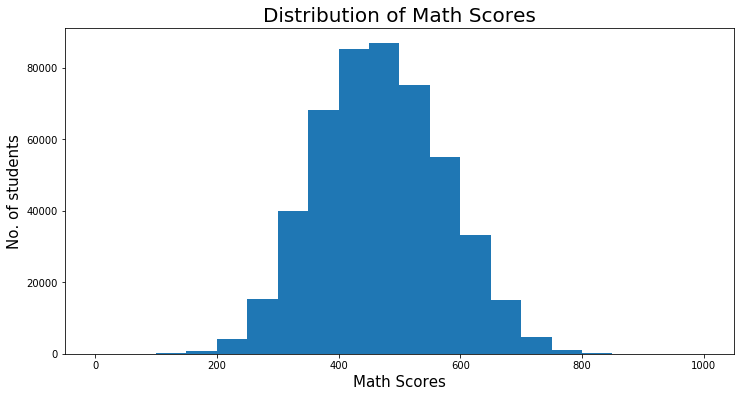

In [37]:
# Distribution of grade scores of Math, Reading and Science
bin_size = np.arange(0, df_clean['math_scores'].max() + 50, 50)

plt.figure(figsize = [12,6])
plt.hist(data = df_clean, x = 'math_scores', bins = bin_size)
plt.xlabel("Math Scores", size = 15)
plt.ylabel("No. of students", size = 15)
plt.title("Distribution of Math Scores", size = 20);

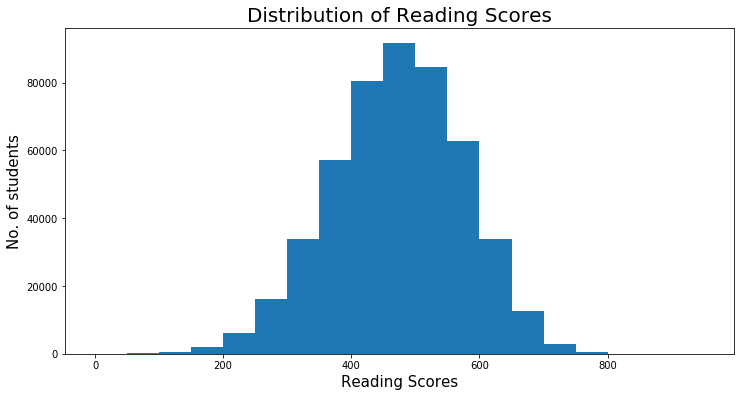

In [38]:
bin_size = np.arange(0, df_clean['reading_scores'].max() + 50, 50)

plt.figure(figsize = [12,6])
plt.hist(data = df_clean, x = 'reading_scores', bins = bin_size)
plt.xlabel("Reading Scores", size = 15)
plt.ylabel("No. of students", size = 15)
plt.title("Distribution of Reading Scores", size = 20);

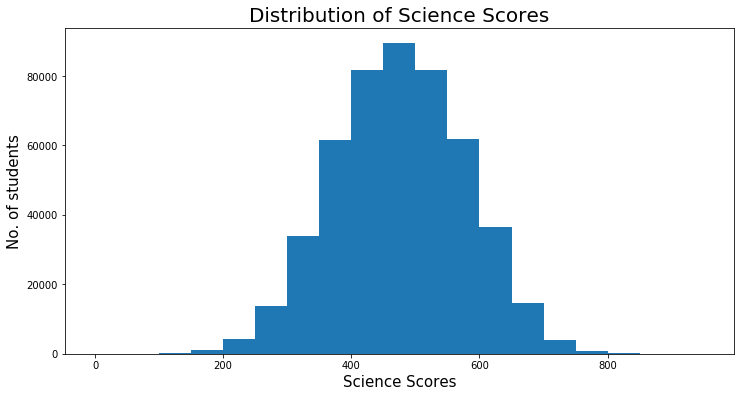

In [39]:
bin_size = np.arange(0, df_clean['science_scores'].max() + 50, 50)

plt.figure(figsize = [12,6])
plt.hist(data = df_clean, x = 'science_scores', bins = bin_size)
plt.xlabel("Science Scores", size = 15)
plt.ylabel("No. of students", size = 15)
plt.title("Distribution of Science Scores", size = 20);

***From these plots, it can be clearly observed that all the three grade scores are normally distributed with the peak around 500***

### Wealth Distribution

In [40]:
df_clean['wealth'].describe()

count    479597.00000
mean         -0.33701
std           1.21530
min          -6.65000
25%          -1.04000
50%          -0.30000
75%           0.43000
max           3.25000
Name: wealth, dtype: float64

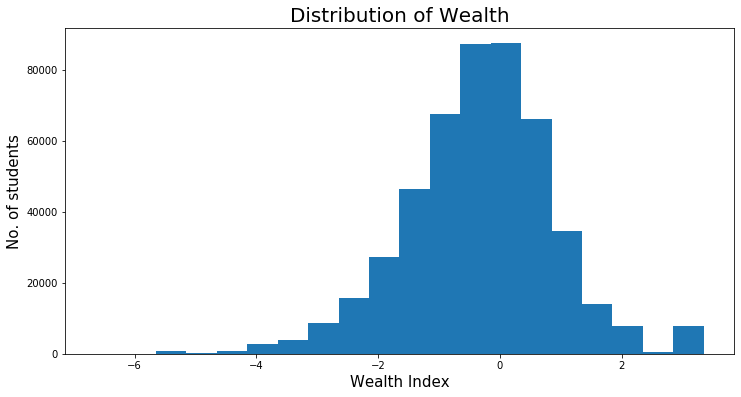

In [41]:
bin_size = np.arange(df_clean['wealth'].min(), df_clean['wealth'].max()+0.5, 0.5)

plt.figure(figsize = [12,6])
plt.hist(data = df_clean, x = 'wealth', bins = bin_size)
plt.xlabel("Wealth Index", size = 15)
plt.ylabel("No. of students", size = 15)
plt.title("Distribution of Wealth", size = 20);

**The distribution of wealth is slightly left skewed showing that there are more people with below average wealth**

### Gender Distribution

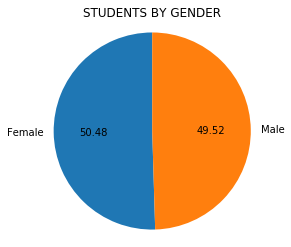

In [42]:
plt.pie(x = df_clean['gender'].value_counts(), labels = df_clean['gender'].value_counts().index, startangle = 90, autopct = '%.2f')
plt.axis('square')
plt.title('STUDENTS BY GENDER');

**The pie chart shows almost equal distribution of males and females**

### Parents' Education Distribution

In [43]:
df_clean['parental_education'].describe()

count    473091.000000
mean         12.995225
std           3.398623
min           3.000000
25%          12.000000
50%          13.000000
75%          16.000000
max          18.000000
Name: parental_education, dtype: float64

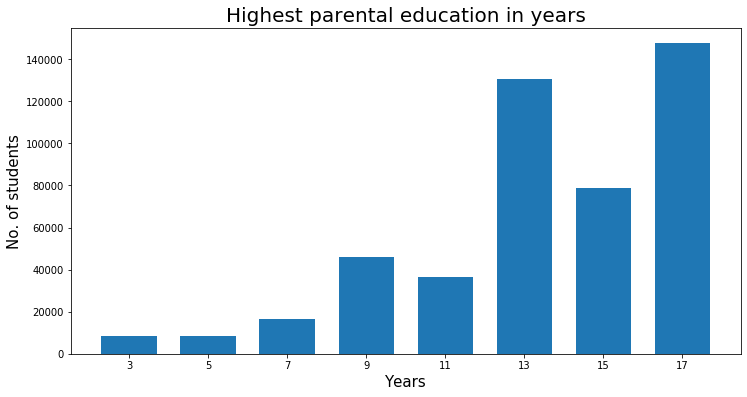

In [44]:
#plot discrete values of parental education years
bins = np.arange(2, df_clean['parental_education'].max()+1, 2)
plt.figure(figsize = [12,6])
plt.hist(data = df_clean, x = 'parental_education', bins = bins, rwidth = 0.7)
plt.xlabel("Years", size = 15)
plt.ylabel("No. of students", size = 15)
plt.title("Highest parental education in years", size = 20)
plt.xticks(np.arange(3, 18, 2));

The histogram shows a left skewed bimodal distribution with the peak at around 13 and 17
years.
> **This shows that most of the parents have completed their schooling and with more than 140k parents completing their graduation**

### Distribution by country

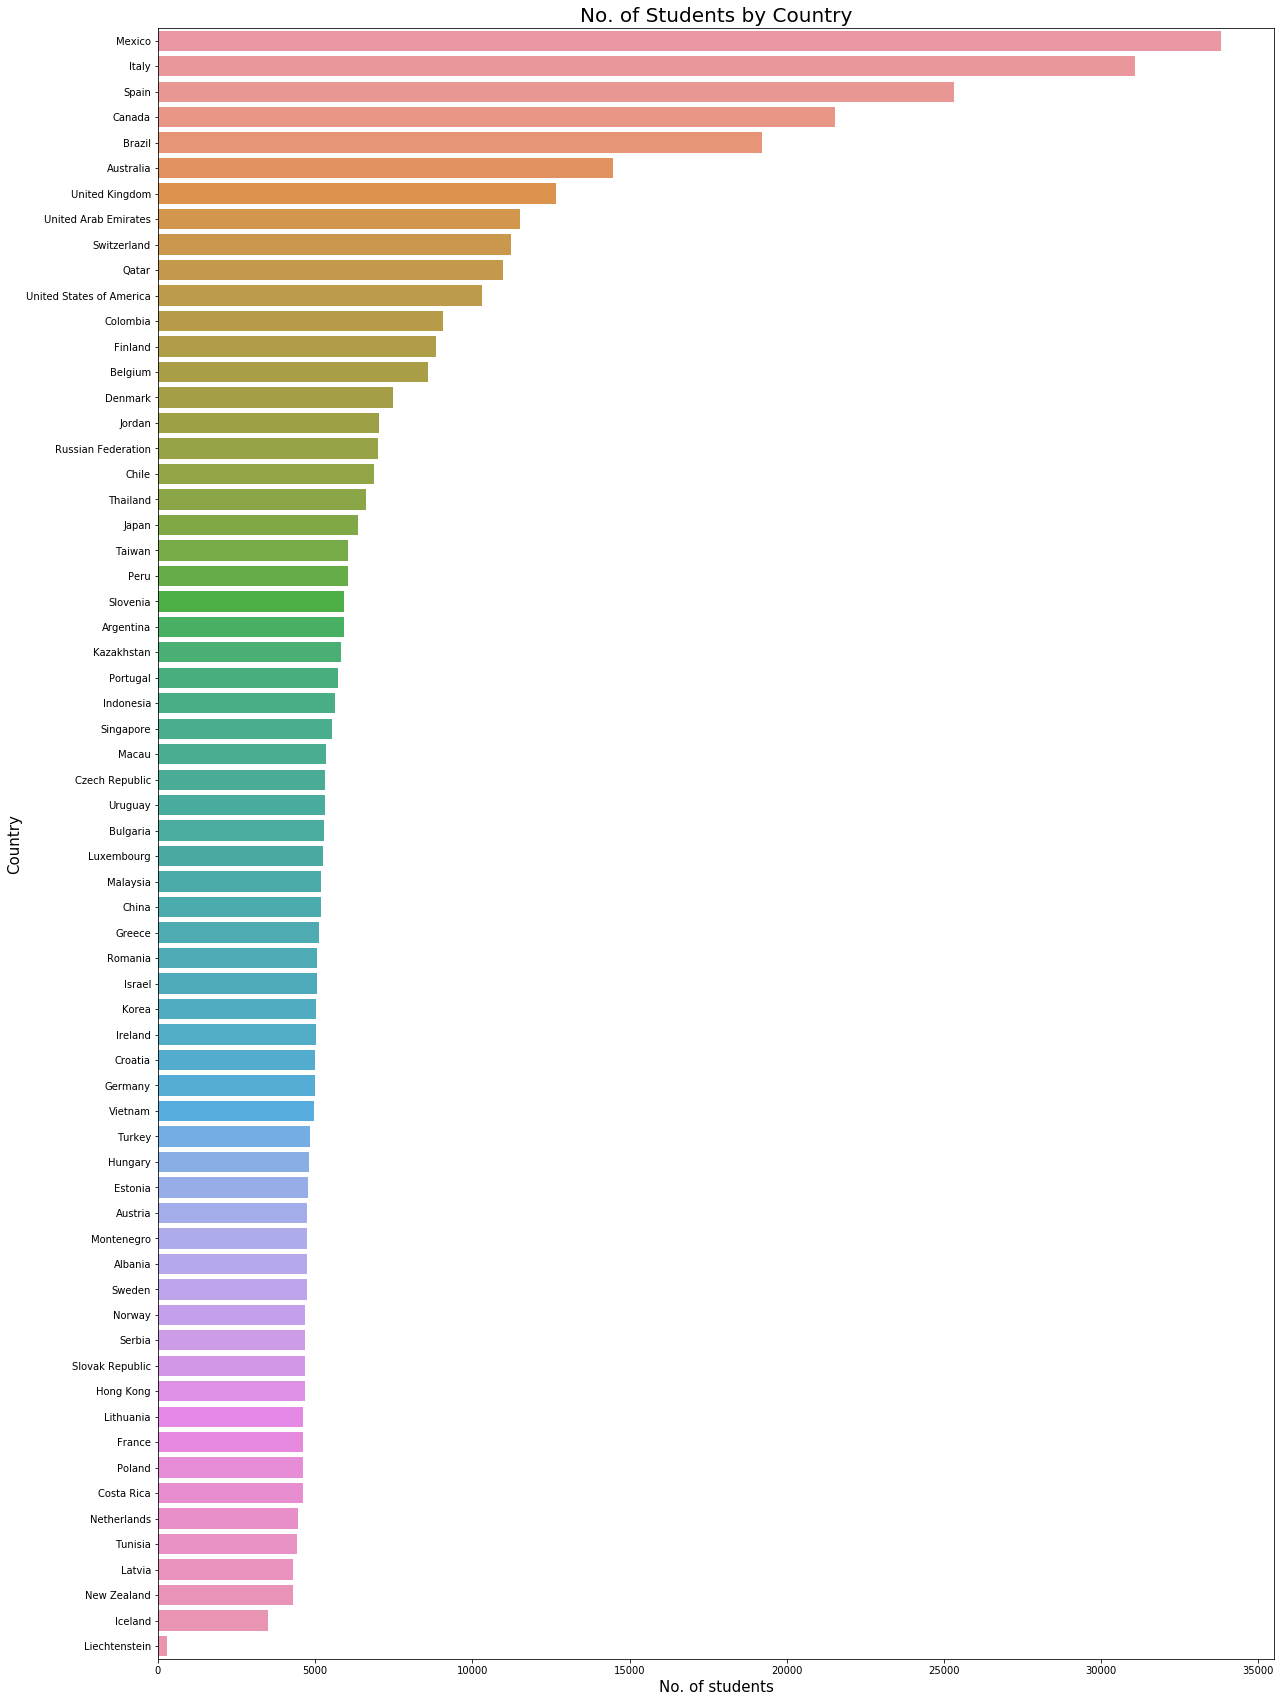

In [45]:
country_order = df_clean['country'].value_counts().index
plt.figure(figsize = [20, 30])
sb.countplot(data = df_clean, y = 'country', order = country_order)
plt.title("No. of Students by Country", size = 20)
plt.xlabel("No. of students", size = 15)
plt.ylabel("Country", size = 15);

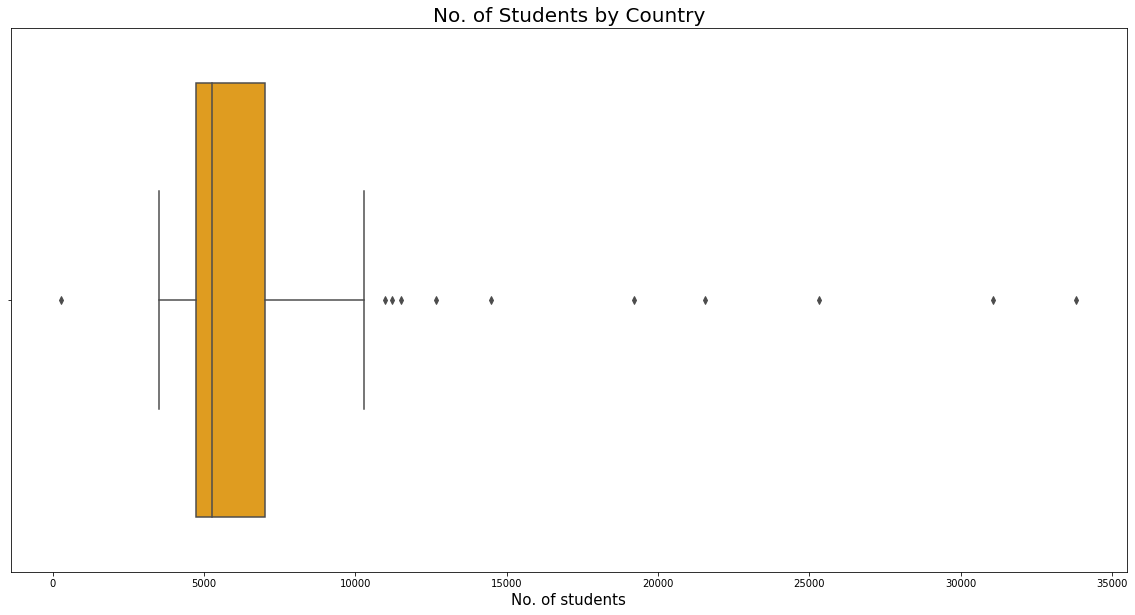

In [46]:
plt.figure(figsize = [20,10])
sb.boxplot(df_clean['country'].value_counts(), color = 'orange')
plt.title("No. of Students by Country", size = 20)
plt.xlabel("No. of students", size = 15);

**The two plots for countries show that:**
- Most countries have 5000 - 7000 students taking the test
- There are few outliers such as Mexico and Italy with more than 30000 students and Liechtenstein with less than 1000 students

### Lets look at the top percentile students in Math, distributed by gender

In [47]:
math_75 = df_clean.query('math_scores >= math_scores.quantile(0.75)')
math_90 = df_clean.query('math_scores >= math_scores.quantile(0.90)')
math_95 = df_clean.query('math_scores >= math_scores.quantile(0.95)')
math_99 = df_clean.query('math_scores >= math_scores.quantile(0.99)')

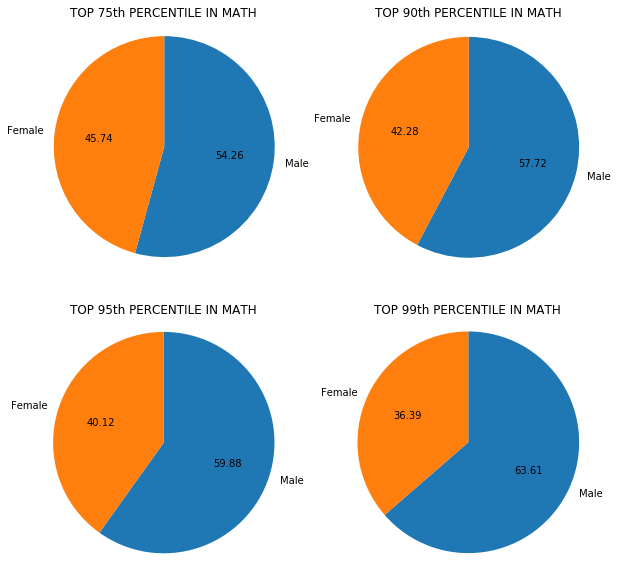

In [48]:
percentile = [75, 90, 95, 99]
fig, axes = plt.subplots(2, 2, figsize = (10, 10))

axes = axes.flatten()

for i in range(4):
    plt.sca(axes[i])
    df = eval('math_' + str(percentile[i]))
    plt.pie(df['gender'].value_counts(), labels = df['gender'].value_counts().index, startangle = 90, autopct = '%.2f', counterclock = False)
    plt.axis('square')
    plt.title('TOP '+ str(percentile[i])+'th PERCENTILE IN MATH')

**It is interesting to note that:** 
> **As the top percentile increases, the gender gap also increases. Male students generally do better in math**

### Now, lets look at the top percentile students in Reading, distributed by gender, and see if it is any different

In [49]:
read_75 = df_clean.query('reading_scores >= reading_scores.quantile(0.75)')
read_90 = df_clean.query('reading_scores >= reading_scores.quantile(0.90)')
read_95 = df_clean.query('reading_scores >= reading_scores.quantile(0.95)')
read_99 = df_clean.query('reading_scores >= reading_scores.quantile(0.99)')

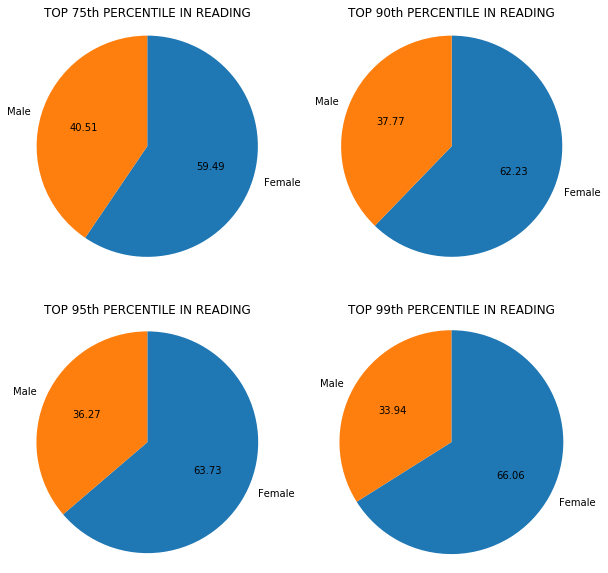

In [50]:
percentile = [75, 90, 95, 99]
fig, axes = plt.subplots(2, 2, figsize = (10, 10))

axes = axes.flatten()

for i in range(4):
    plt.sca(axes[i])
    df = eval('read_' + str(percentile[i]))
    plt.pie(df['gender'].value_counts(), labels = df['gender'].value_counts().index, startangle = 90, autopct = '%.2f', counterclock = False)
    plt.axis('square')
    plt.title('TOP '+ str(percentile[i])+'th PERCENTILE IN READING')

**In the case of Reading:** 
> **As the top percentile increases, Female students do better than Male**

### Now, lets look at the top percentile students in Science, distributed by gender, and see the results

In [51]:
science_75 = df_clean.query('science_scores >= science_scores.quantile(0.75)')
science_90 = df_clean.query('science_scores >= science_scores.quantile(0.90)')
science_95 = df_clean.query('science_scores >= science_scores.quantile(0.95)')
science_99 = df_clean.query('science_scores >= science_scores.quantile(0.99)')

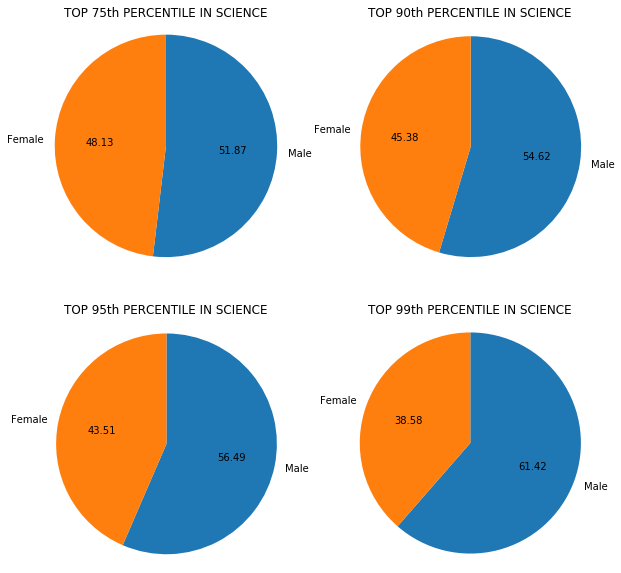

In [52]:
percentile = [75, 90, 95, 99]
fig, axes = plt.subplots(2, 2, figsize = (10, 10))

axes = axes.flatten()

for i in range(4):
    plt.sca(axes[i])
    df = eval('science_' + str(percentile[i]))
    plt.pie(df['gender'].value_counts(), labels = df['gender'].value_counts().index, startangle = 90, autopct = '%.2f', counterclock = False)
    plt.axis('square')
    plt.title('TOP '+ str(percentile[i])+'th PERCENTILE IN SCIENCE')

**In the case of Science:** 
> **As the top percentile increases, again the Male students do better than Female**

### Personal Traits/characteristics of Students

I am focusing on the below six traits of students
- perseverence
- work ethic of student
- anxiety towards math
- interest in Math
- behaviour towards other activities that enhance Math skills
- motivation for future achievements

In [53]:
#Check stats of all the traits
traits = ['perseverence', 'work_ethic', 'anxiety', 'interest', 'behaviour', 'motivation']
for col in traits:
    info = df_clean[col].describe()
    print(info, '\n')

count    313172.000000
mean          0.140125
std           0.996012
min          -4.053000
25%          -0.340700
50%           0.051100
75%           0.479500
max           3.528600
Name: perseverence, dtype: float64 

count    306731.000000
mean          2.866265
std           0.577228
min           1.000000
25%           2.555556
50%           2.888889
75%           3.222222
max           4.000000
Name: work_ethic, dtype: float64 

count    307425.000000
mean          2.495314
std           0.683011
min           1.000000
25%           2.000000
50%           2.400000
75%           3.000000
max           4.000000
Name: anxiety, dtype: float64 

count    311611.000000
mean          2.445061
std           0.779287
min           1.000000
25%           2.000000
50%           2.500000
75%           3.000000
max           4.000000
Name: interest, dtype: float64 

count    307112.000000
mean          1.677428
std           0.557671
min           1.000000
25%           1.250000
50%         

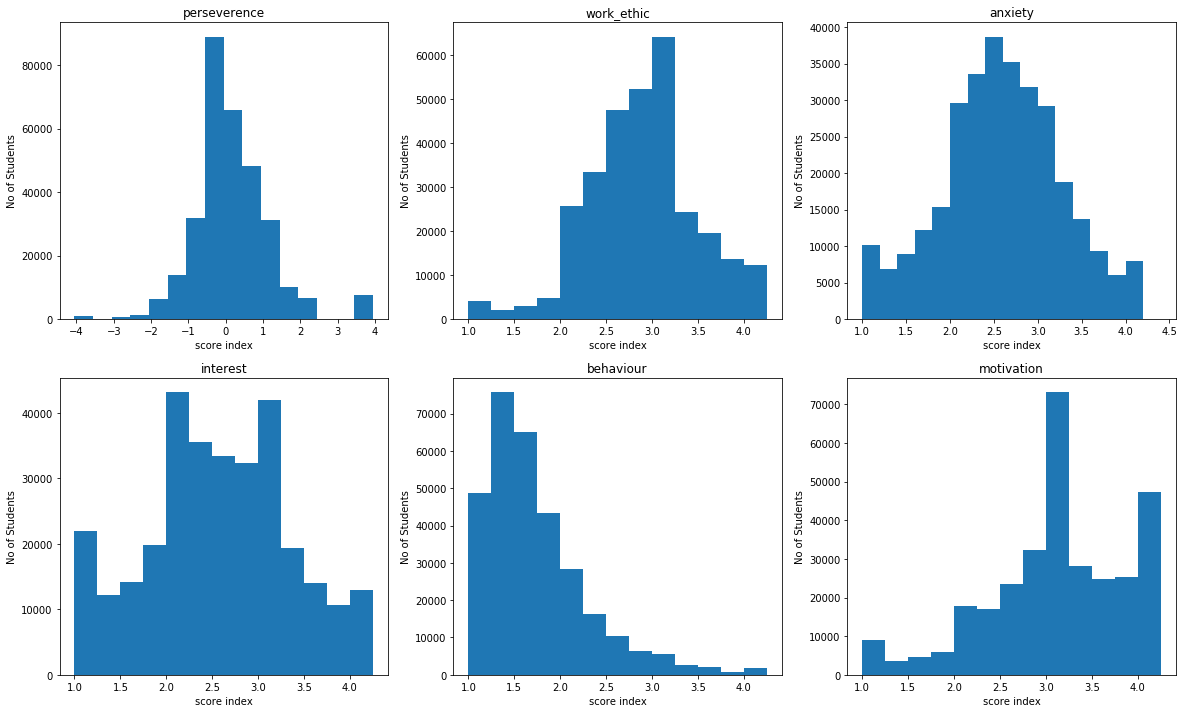

In [54]:
#Plot distribution subplots for each of the trait

plt.figure(figsize = [20, 12]) # larger figure size for subplots


plt.subplot(2, 3, 1) # 2 row, 3 cols, subplot 1
bin_edges1 = np.arange(df_clean['perseverence'].min(), df_clean['perseverence'].max()+0.5, 0.5)
plt.hist(data = df_clean, x = 'perseverence', bins = bin_edges1)
plt.title("perseverence")
plt.xlabel("score index")
plt.ylabel("No of Students")


plt.subplot(2, 3, 2) # 2 row, 3 cols, subplot 2
bin_edges2 = np.arange(df_clean['work_ethic'].min(), df_clean['work_ethic'].max()+0.5, 0.25)
plt.hist(data = df_clean, x = 'work_ethic', bins = bin_edges2)
plt.title("work_ethic")
plt.xlabel("score index")
plt.ylabel("No of Students")

plt.subplot(2, 3, 3) # 2 row, 3 cols, subplot 3
bin_edges3 = np.arange(df_clean['anxiety'].min(), df_clean['anxiety'].max()+0.5, 0.20)
plt.hist(data = df_clean, x = 'anxiety', bins = bin_edges3)
plt.title("anxiety")
plt.xlabel("score index")
plt.ylabel("No of Students")

plt.subplot(2, 3, 4) # 2 row, 3 cols, subplot 4
bin_edges4 = np.arange(df_clean['interest'].min(), df_clean['interest'].max()+0.5, 0.25)
plt.hist(data = df_clean, x = 'interest', bins = bin_edges4)
plt.title("interest")
plt.xlabel("score index")
plt.ylabel("No of Students")

plt.subplot(2, 3, 5) # 2 row, 3 cols, subplot 5
bin_edges5 = np.arange(df_clean['behaviour'].min(), df_clean['behaviour'].max()+0.5, 0.25)
plt.hist(data = df_clean, x = 'behaviour', bins = bin_edges5)
plt.title("behaviour")
plt.xlabel("score index")
plt.ylabel("No of Students");

plt.subplot(2, 3, 6) # 2 row, 3 cols, subplot 6
bin_edges6 = np.arange(df_clean['motivation'].min(), df_clean['motivation'].max()+0.5, 0.25)
plt.hist(data = df_clean, x = 'motivation', bins = bin_edges6)
plt.title("motivation")
plt.xlabel("score index")
plt.ylabel("No of Students");

- `perseverence` and `anxiety` are almost normally distributed
- `work_ethic` is slightly skewed to the left with a spike at around 3 points.
- `behaviour` is skewed to the right which shows that most students are not interested in extra activities such as talking about math with friends, playing chess, or computer programming
- `interest` seems bimodal with two peaks at around points 2 and 3.25
- `motivation` seems bimodal and left skewed

### Key insights from Univariate Distribution

> - Male students, on average do better in Math and science whereas Female students perform better in Reading
> - About 5k - 7k students participate from most countries with the exception of some outliers
> - There are multiple types of distributions in the personal traits. It would be interesting to see their relation with grade scores

## Bivariate Exploration

> In this section, we will investigate relationships between pairs of variables in the data.

### Let's see students of which countries have highest average Math scores

In [55]:
order = df_clean.groupby('country')['math_scores'].mean().sort_values(ascending = False).index

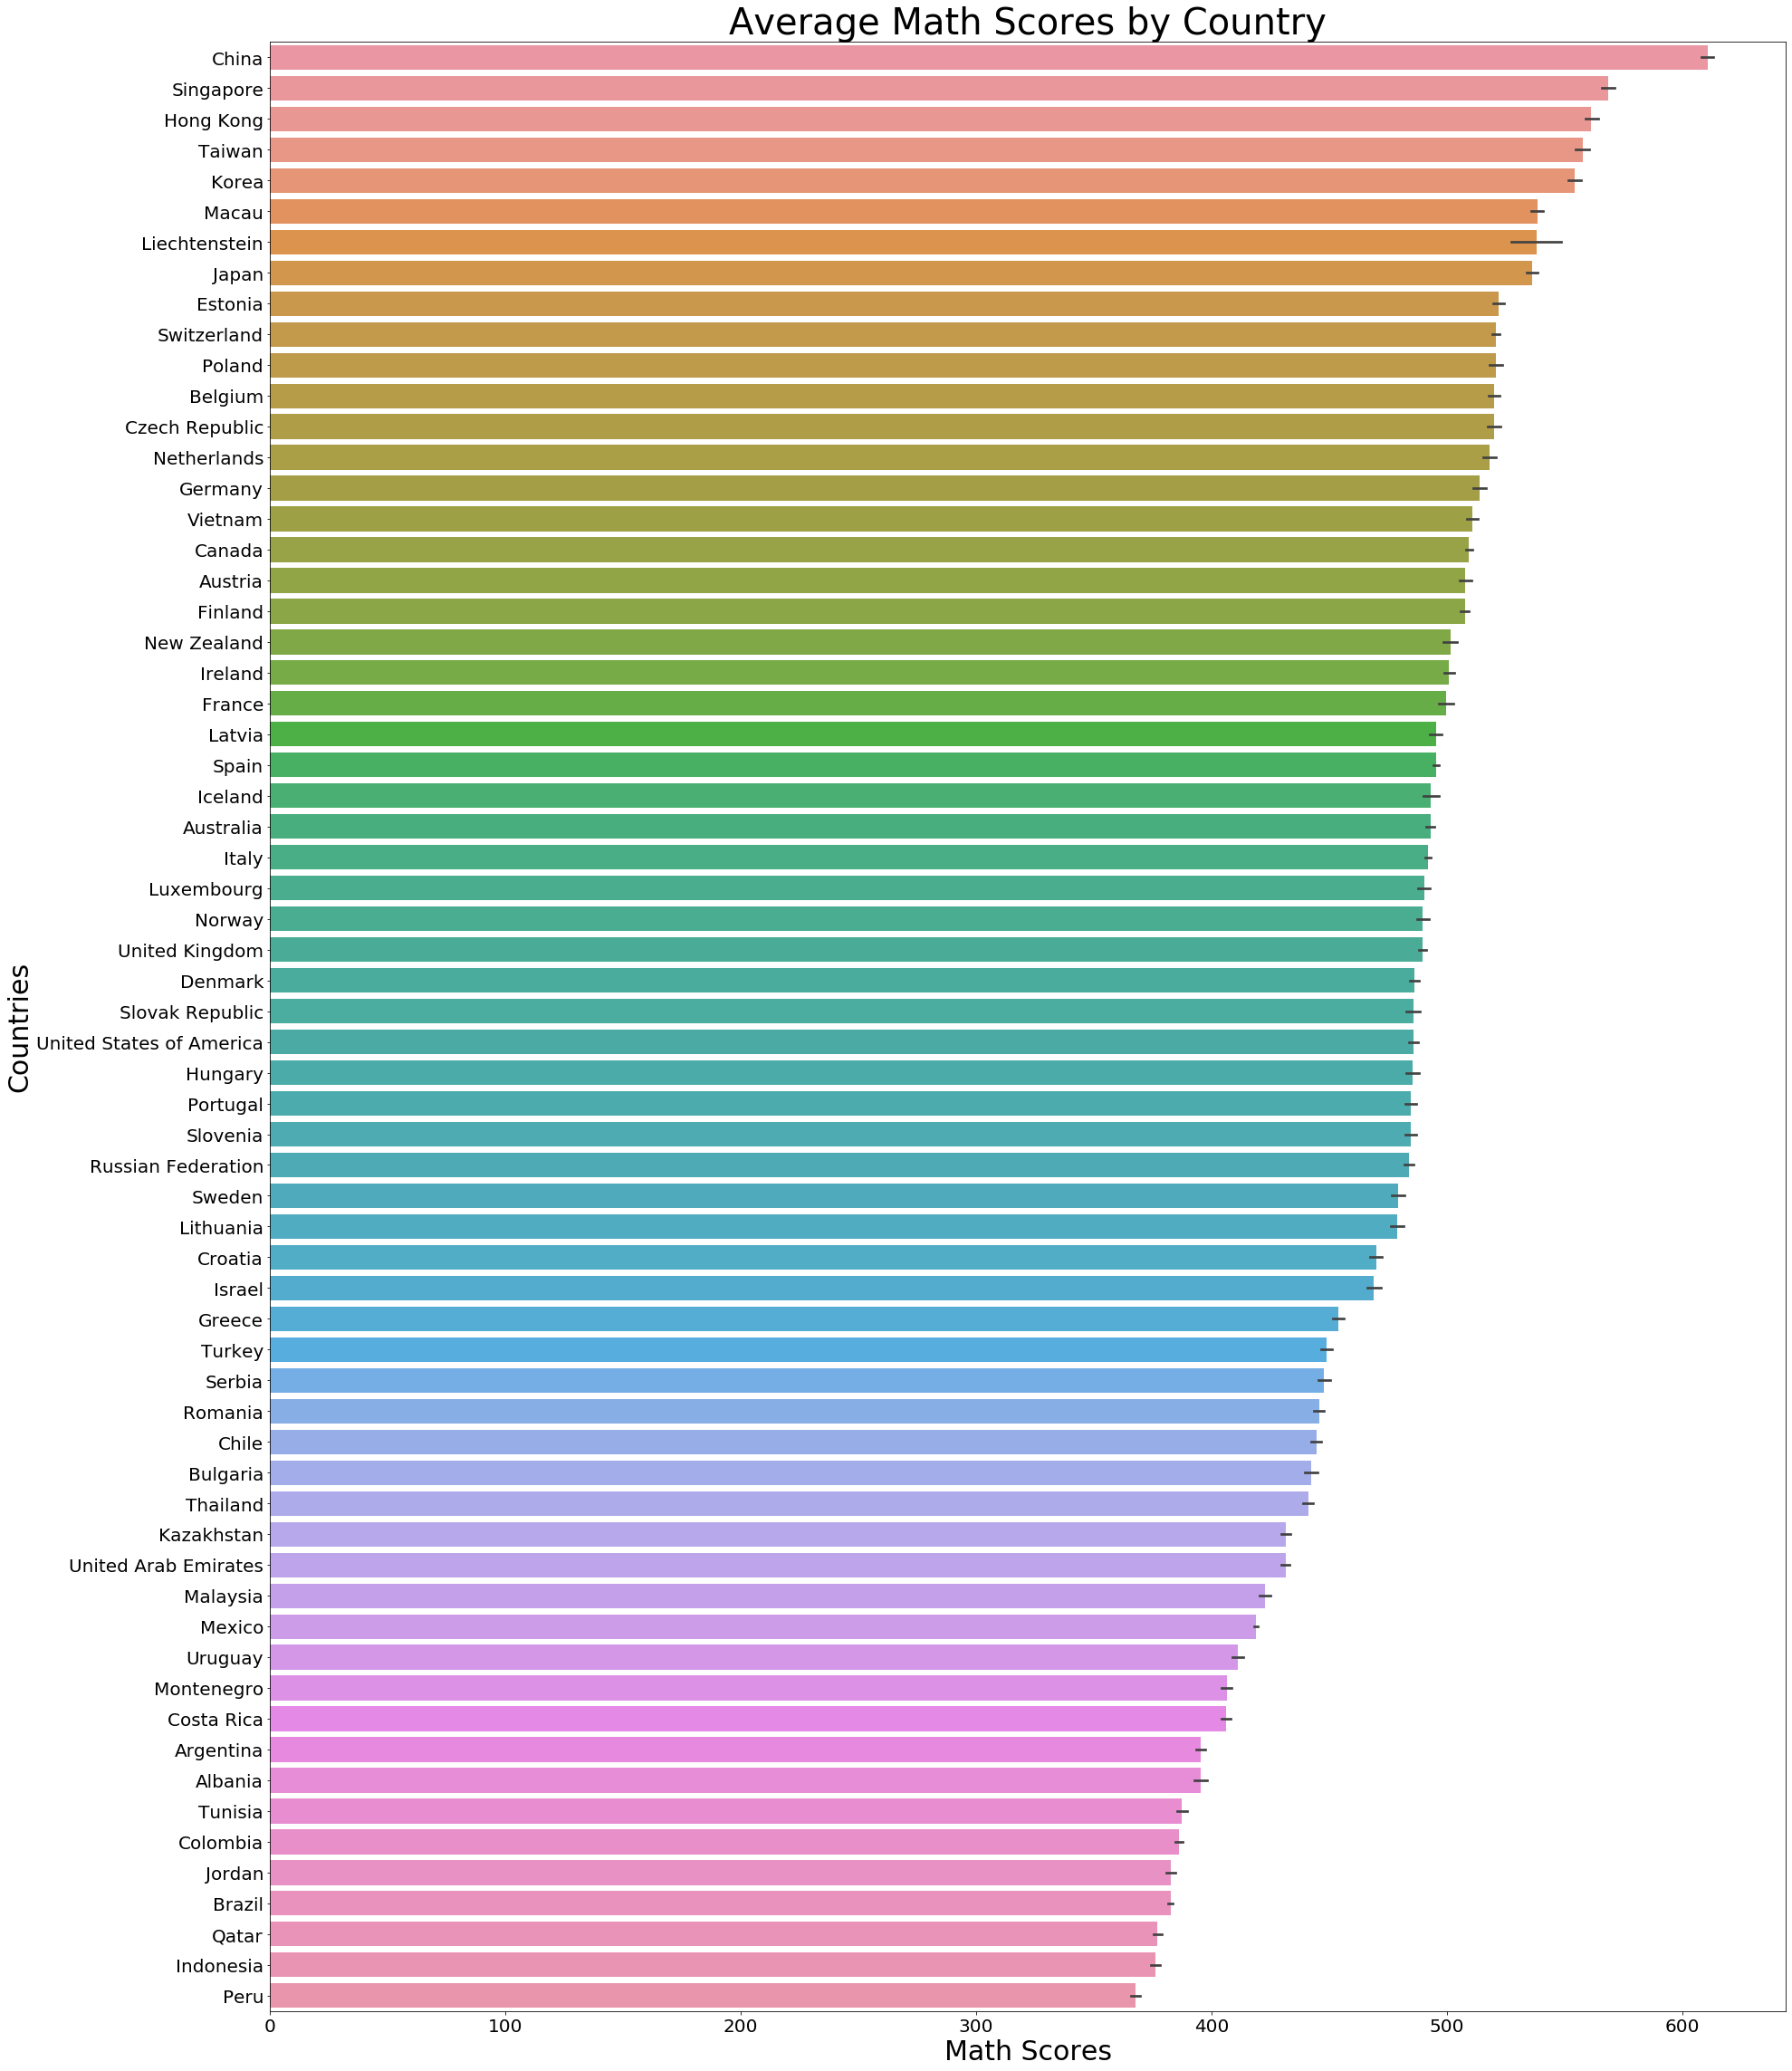

In [56]:
plt.figure(figsize = [30, 40])
b = sb.barplot(data = df_clean, y = 'country', x = 'math_scores', order = order);
b.axes.set_title("Average Math Scores by Country",fontsize=40)
b.set_xlabel("Math Scores",fontsize=30)
b.set_ylabel("Countries",fontsize=30)
b.tick_params(labelsize = 20);

**Students from Eastern countries such as China, Taiwan, Singapore, Korea score highest in math on average**

### Now let's check which countries have highest average Reading scores

In [57]:
read_order = df_clean.groupby('country')['reading_scores'].mean().sort_values(ascending = False).index

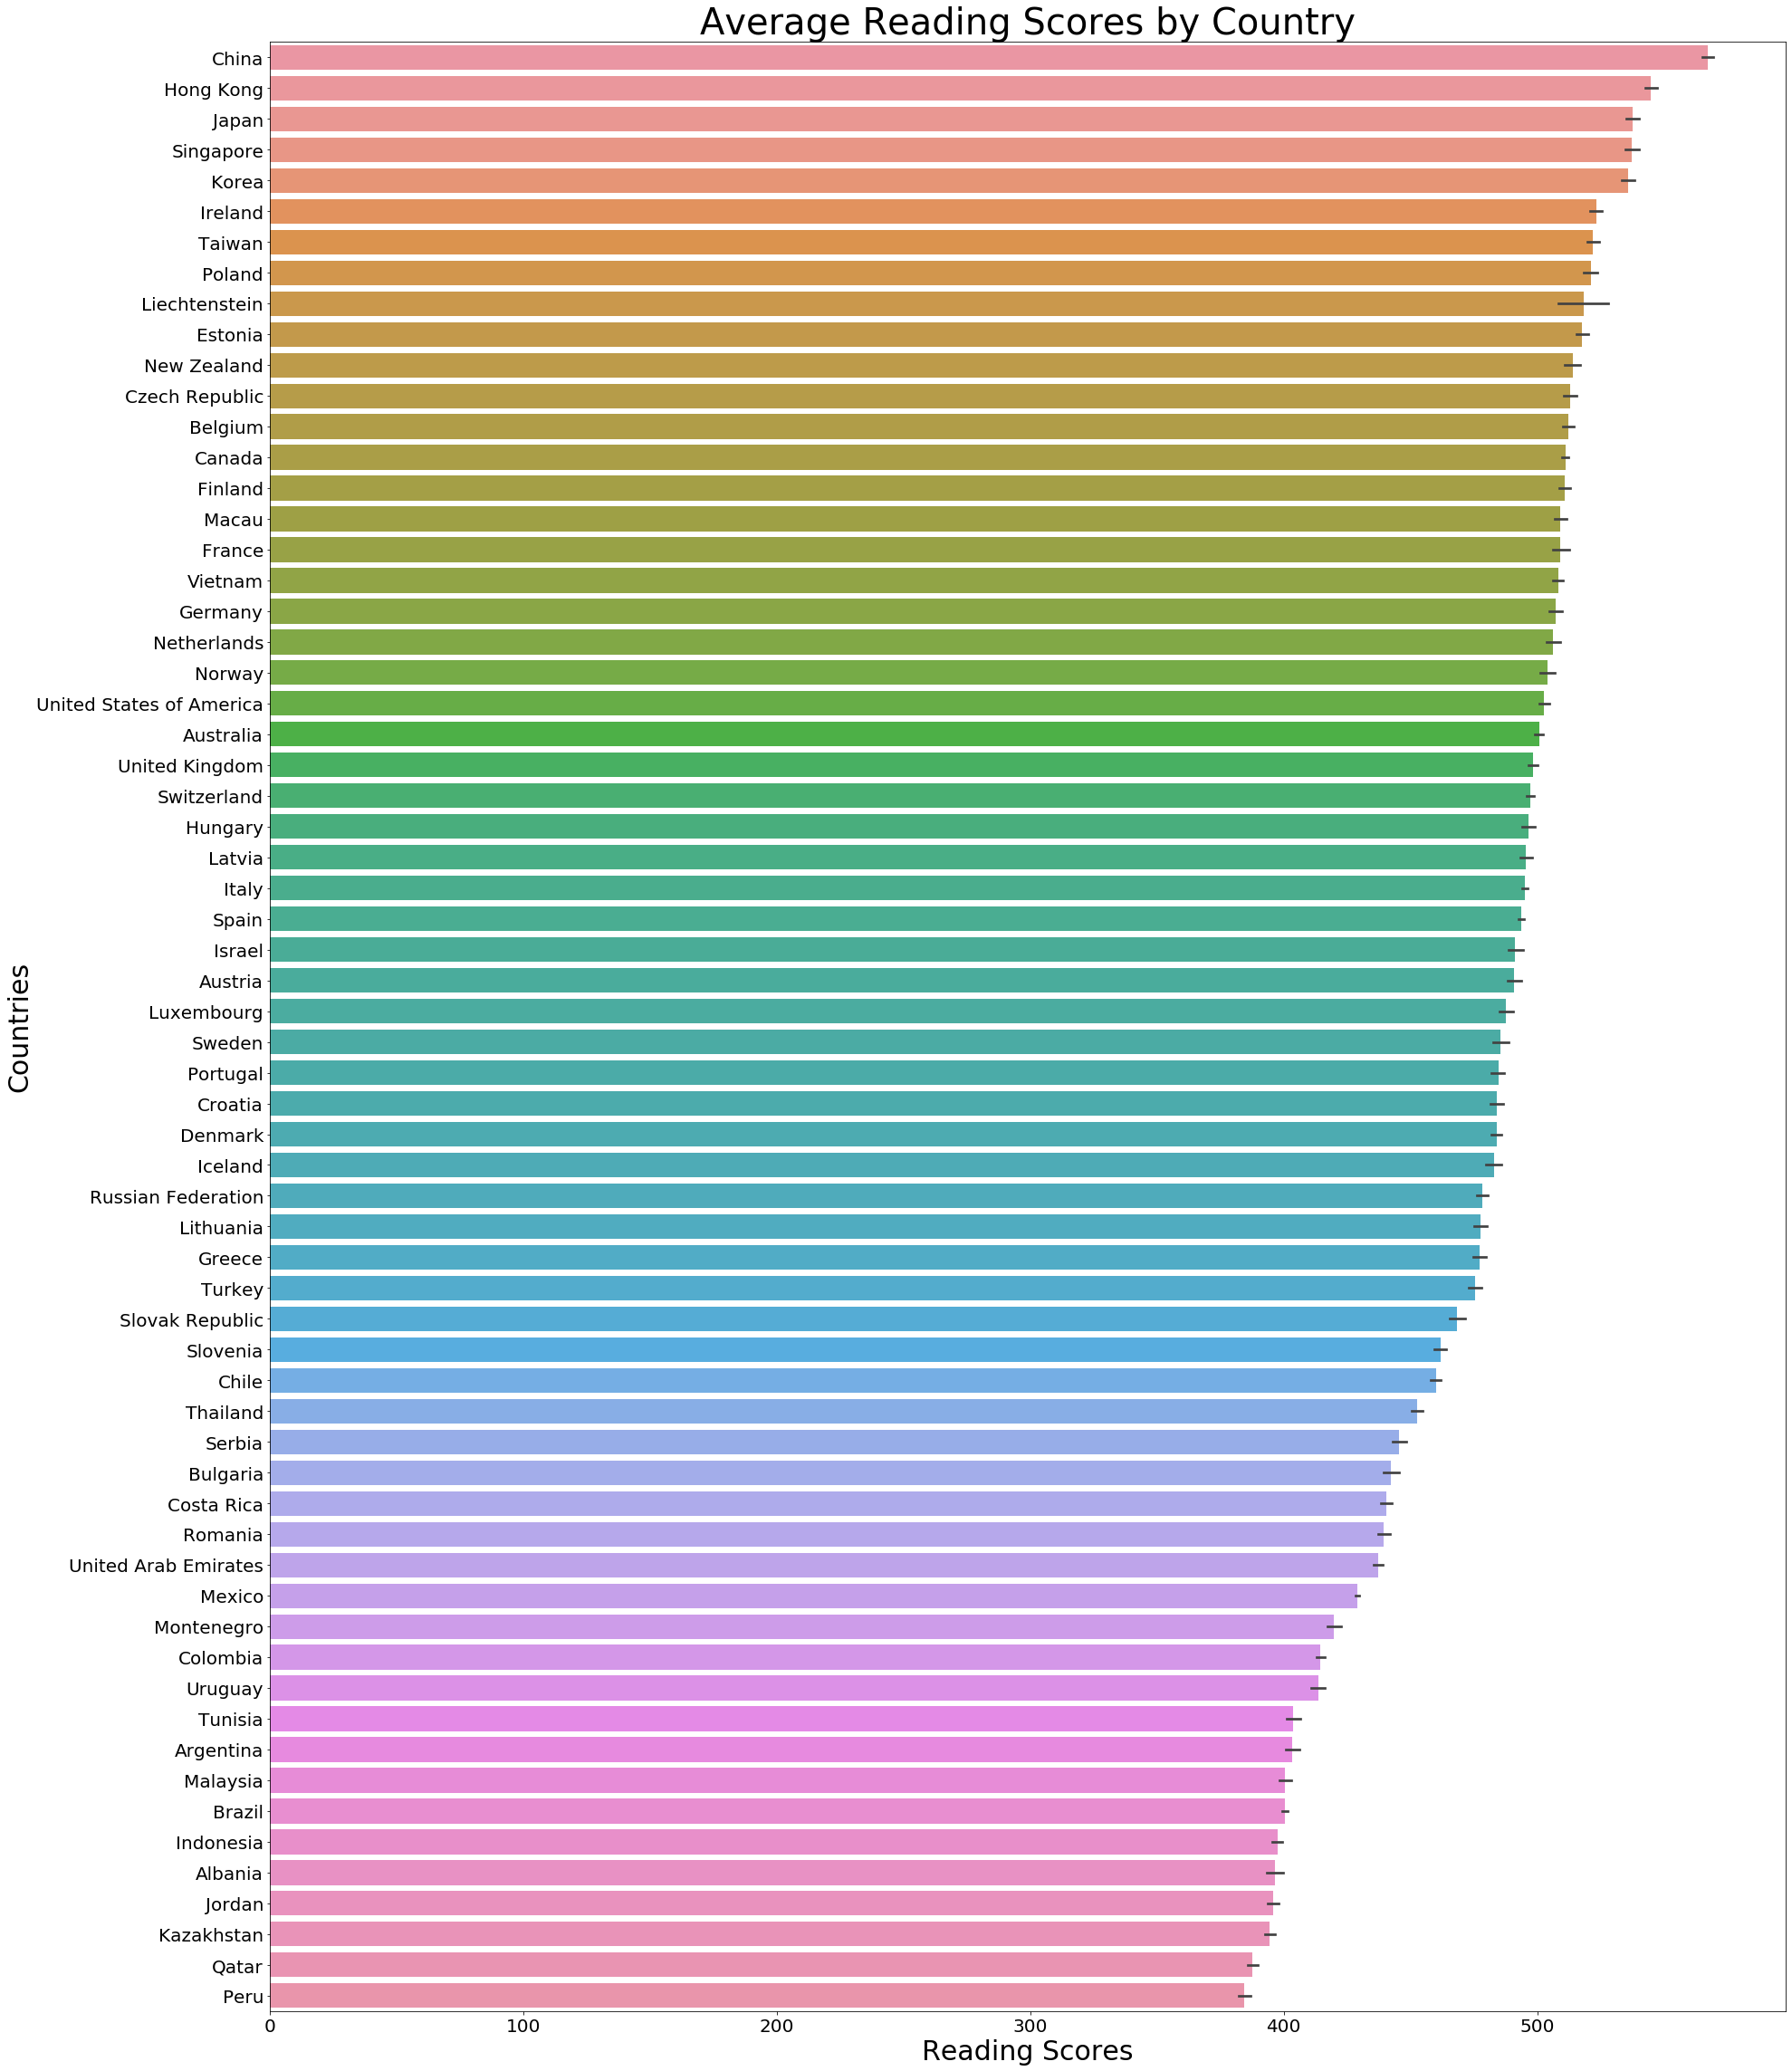

In [58]:
plt.figure(figsize = [30, 40])
b = sb.barplot(data = df_clean, y = 'country', x = 'reading_scores', order = read_order);
b.axes.set_title("Average Reading Scores by Country",fontsize=40)
b.set_xlabel("Reading Scores",fontsize=30)
b.set_ylabel("Countries",fontsize=30)
b.tick_params(labelsize = 20);

**Same goes for reading scores as well. Students from eastern countries are much ahead**

### Now, let's check for average science scores by country

In [59]:
sci_order = df_clean.groupby('country')['science_scores'].mean().sort_values(ascending = False).index

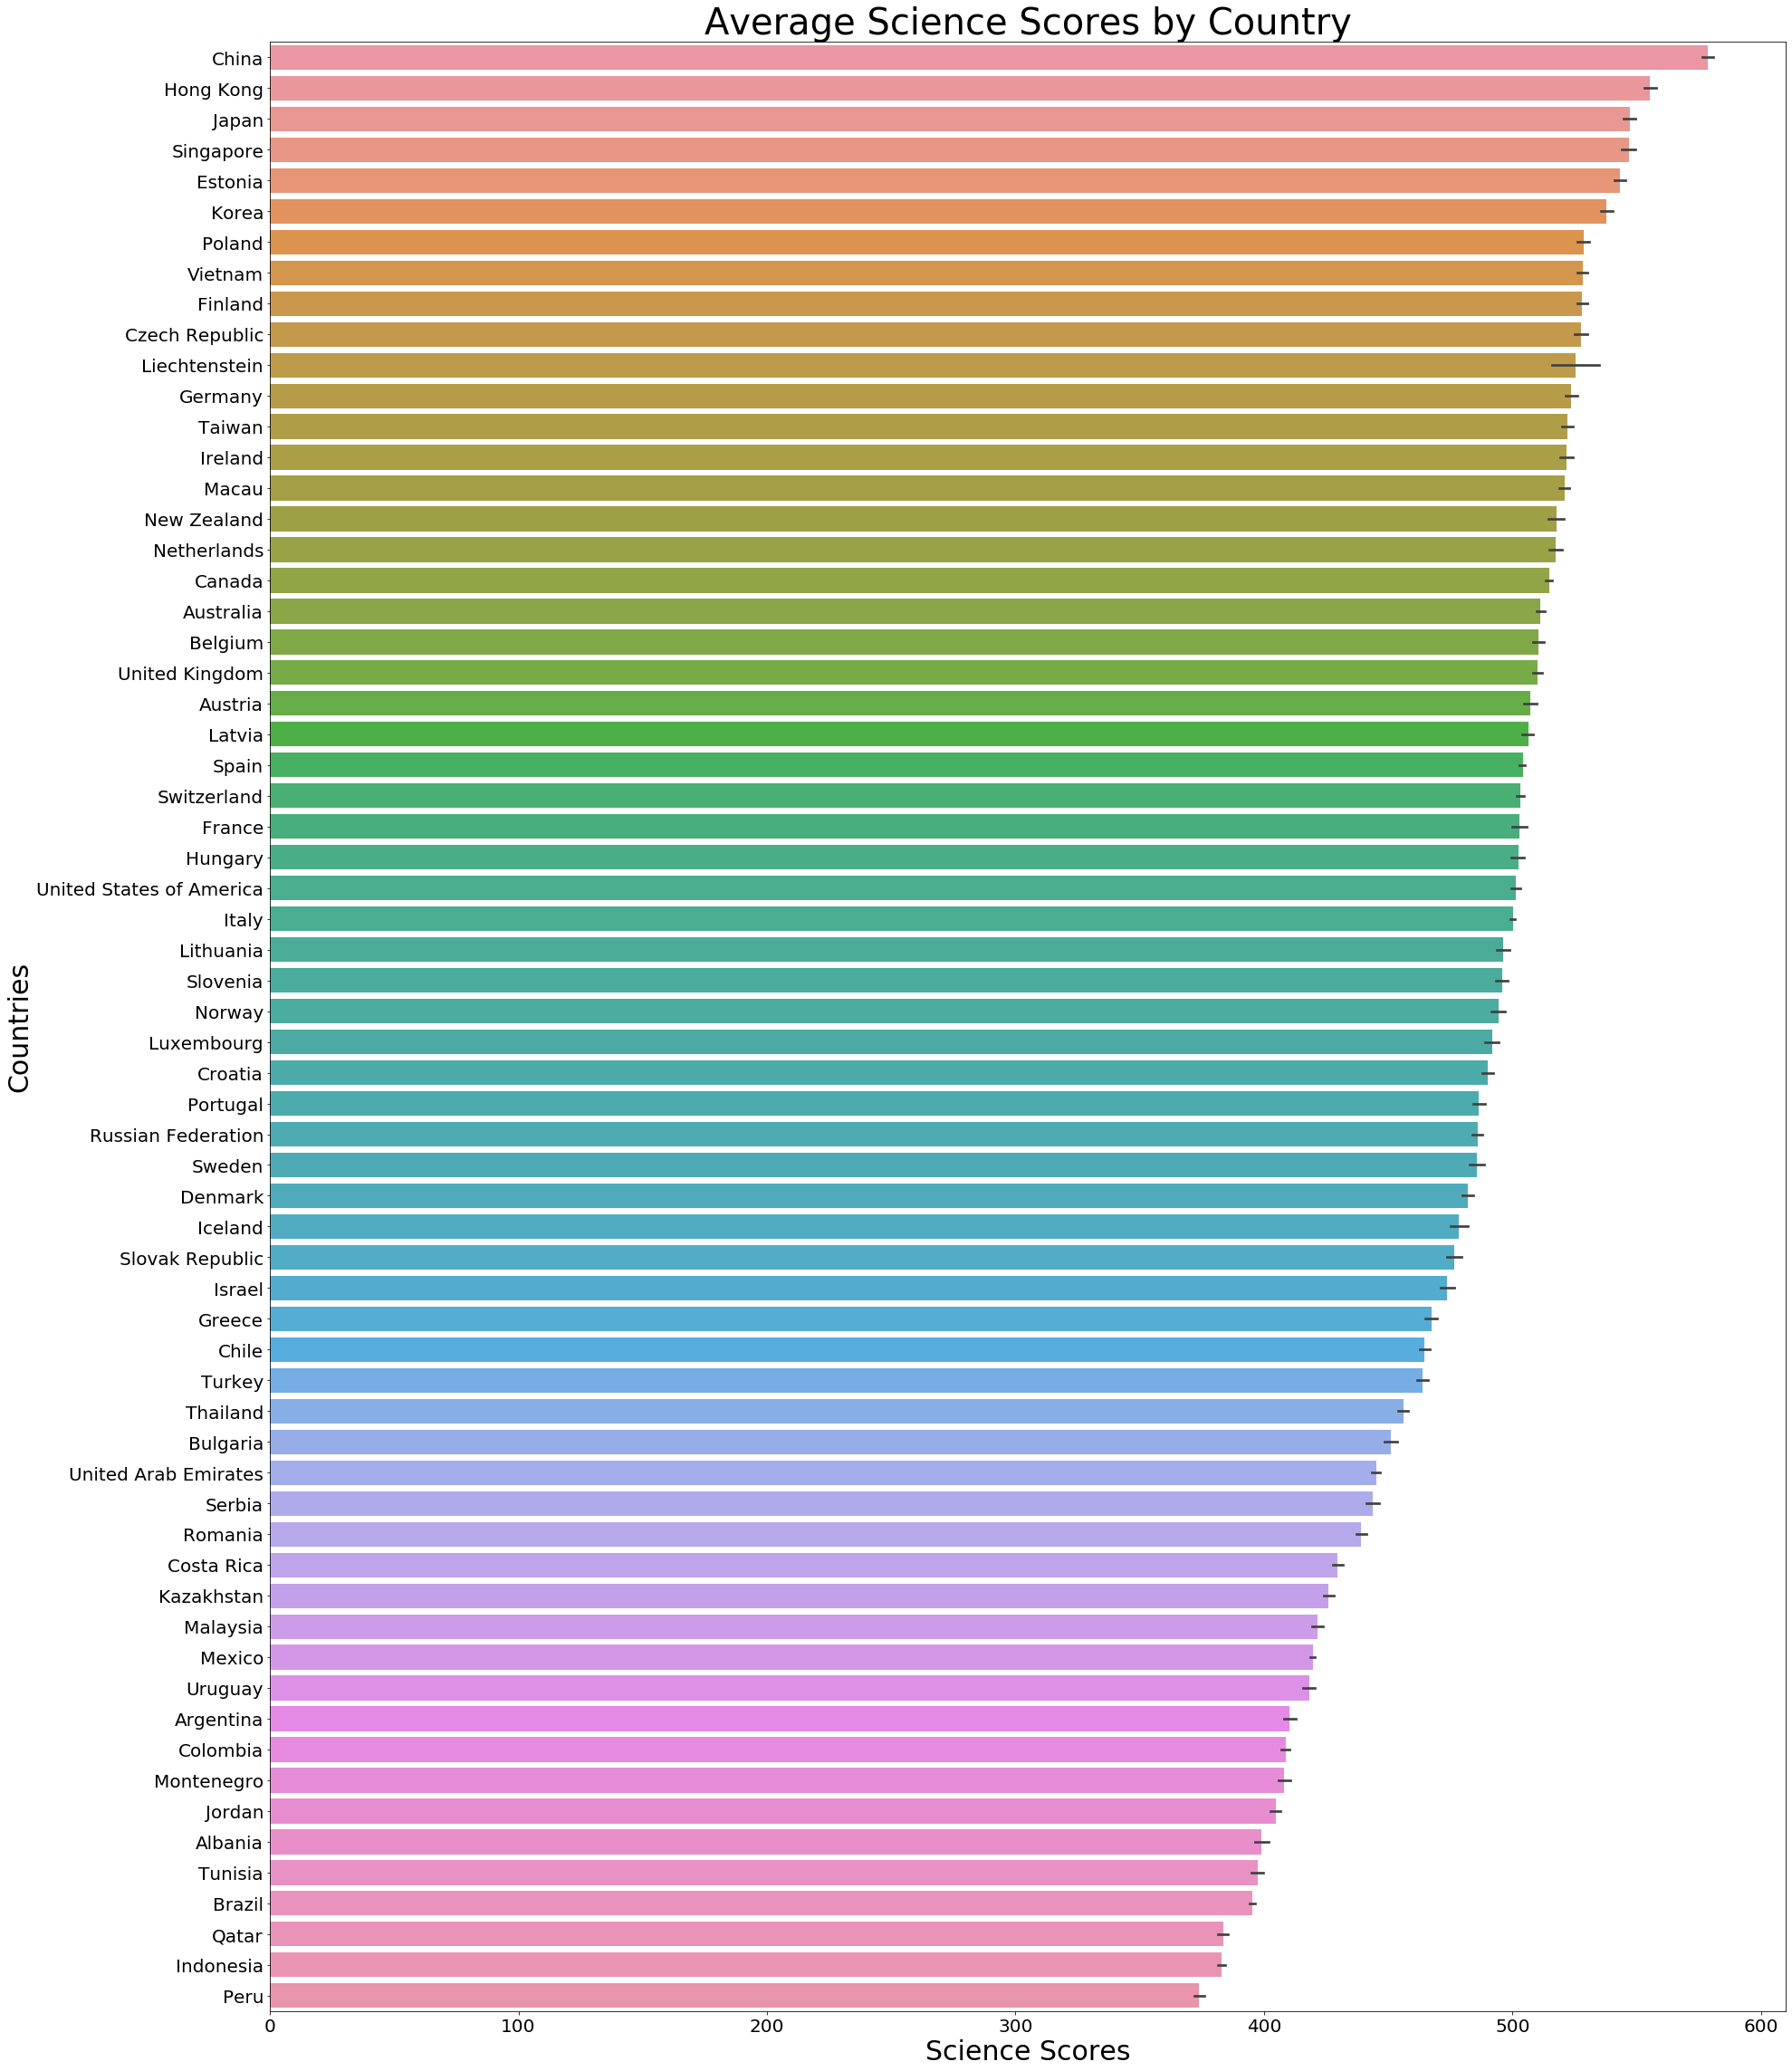

In [60]:
plt.figure(figsize = [30, 40])
b = sb.barplot(data = df_clean, y = 'country', x = 'science_scores', order = sci_order);
b.axes.set_title("Average Science Scores by Country",fontsize=40)
b.set_xlabel("Science Scores",fontsize=30)
b.set_ylabel("Countries",fontsize=30)
b.tick_params(labelsize = 20);

**Observations from the plots of countries:**
- Students from eastern countries such as China, Korea, Taiwan, Singapore consistently score highest in Math, Reading, and Science
- Students from Peru, Qatar, Indonesia, Jordan consistently scores lowest in all the subjects

### Do students with more wealth score more?

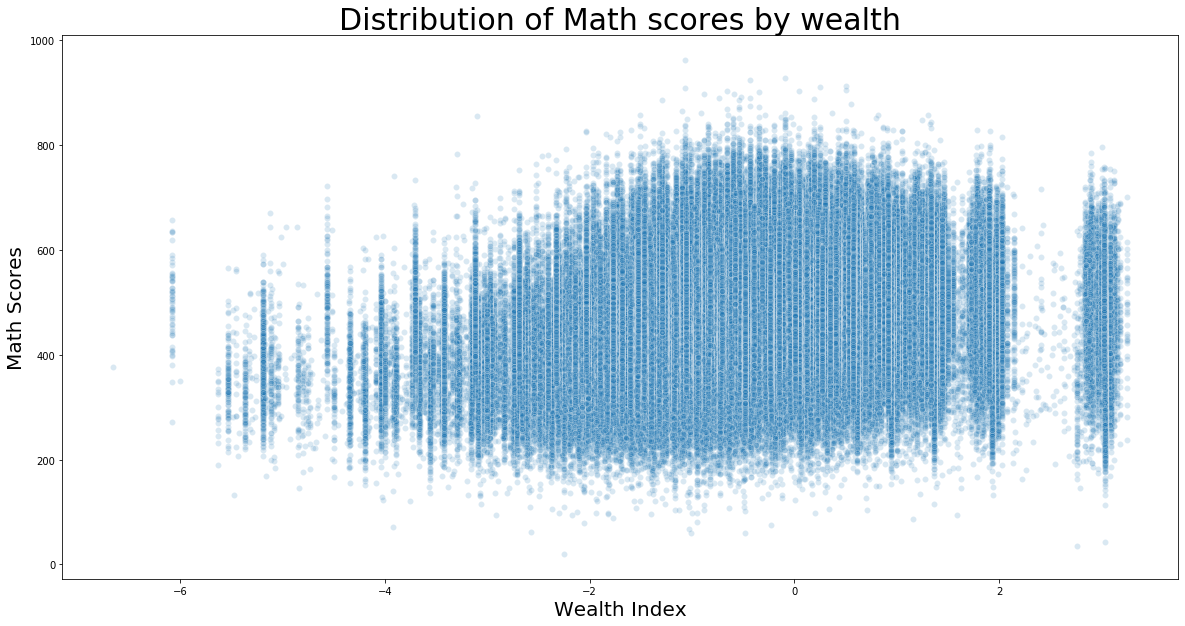

In [61]:
plt.figure(figsize = [20, 10])
sb.scatterplot(data = df_clean, x = 'wealth', y = 'math_scores',
           x_jitter = 0.3, y_jitter = 0.3, alpha =  1/6);
plt.xlabel("Wealth Index", fontsize = 20)
plt.ylabel("Math Scores", fontsize = 20)
plt.title("Distribution of Math scores by wealth", fontsize = 30);

**There seems to be some increase in scores as the wealth increases, but it plateaus after a certain level**

### Does the education level of parents affect scores of students?

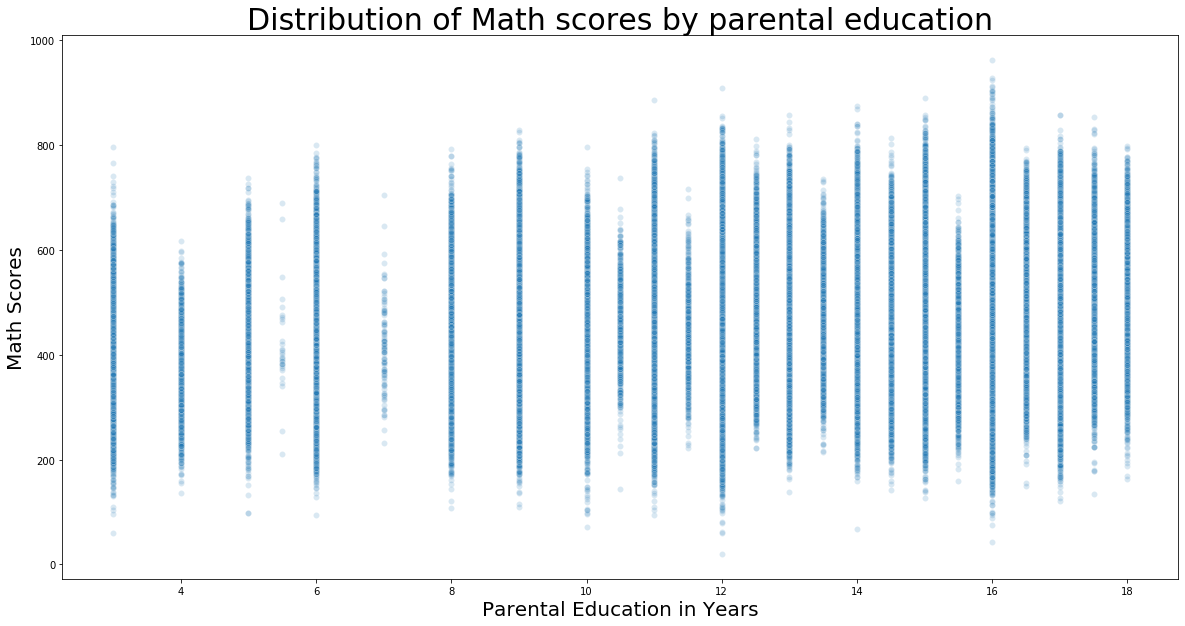

In [62]:
plt.figure(figsize = [20, 10])
sb.scatterplot(data = df_clean, x = 'parental_education', y = 'math_scores',
           x_jitter = 0.3, y_jitter = 0.3, alpha =  1/6);
plt.xlabel("Parental Education in Years", fontsize = 20)
plt.ylabel("Math Scores", fontsize = 20)
plt.title("Distribution of Math scores by parental education", fontsize = 30);

**There seems a weak positive correlation between wealth and Math Scores of students**

### Let's see if students score more if one or both the parents are at home

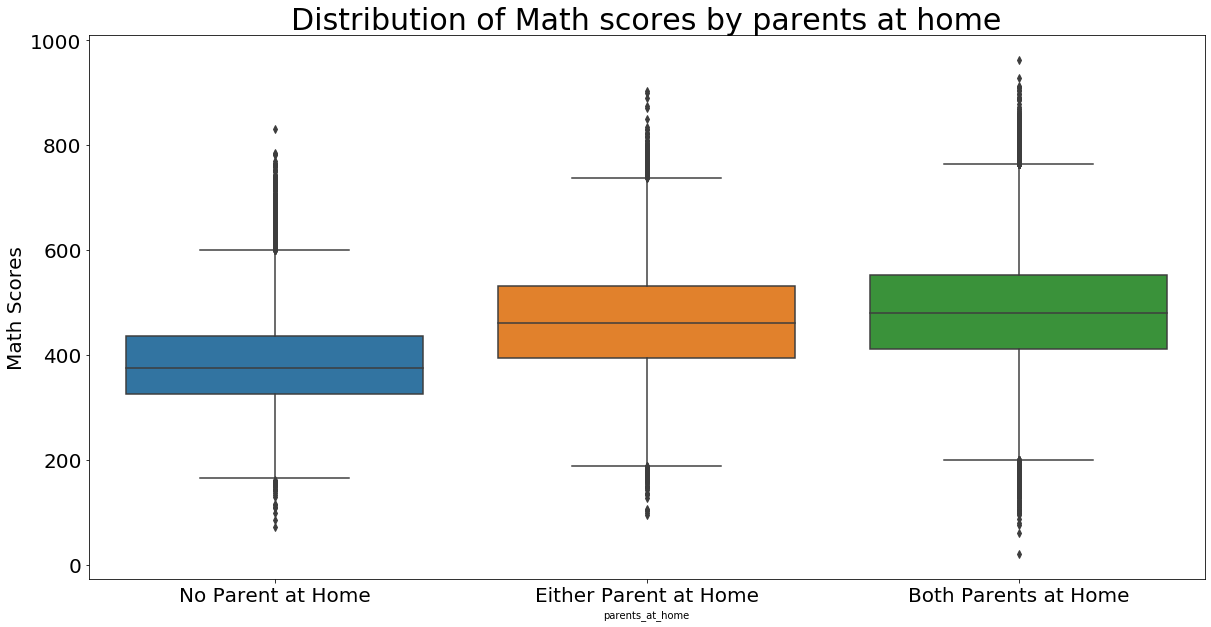

In [63]:
plt.figure(figsize = [20, 10])
b = sb.boxplot(data = df_clean, x = 'parents_at_home', y = 'math_scores')
plt.ylabel("Math Scores", fontsize = 20)
plt.title("Distribution of Math scores by parents at home", fontsize = 30)
plt.xticks([0.0, 1.0, 2.0], ['No Parent at Home', 'Either Parent at Home', 'Both Parents at Home'])
b.tick_params(labelsize = 20);

**There is a definite increase in Math Scores with the presence of either one or both the parents at home. The above plot shows the importance of parents in students' grades**

### Math Scores by personal traits

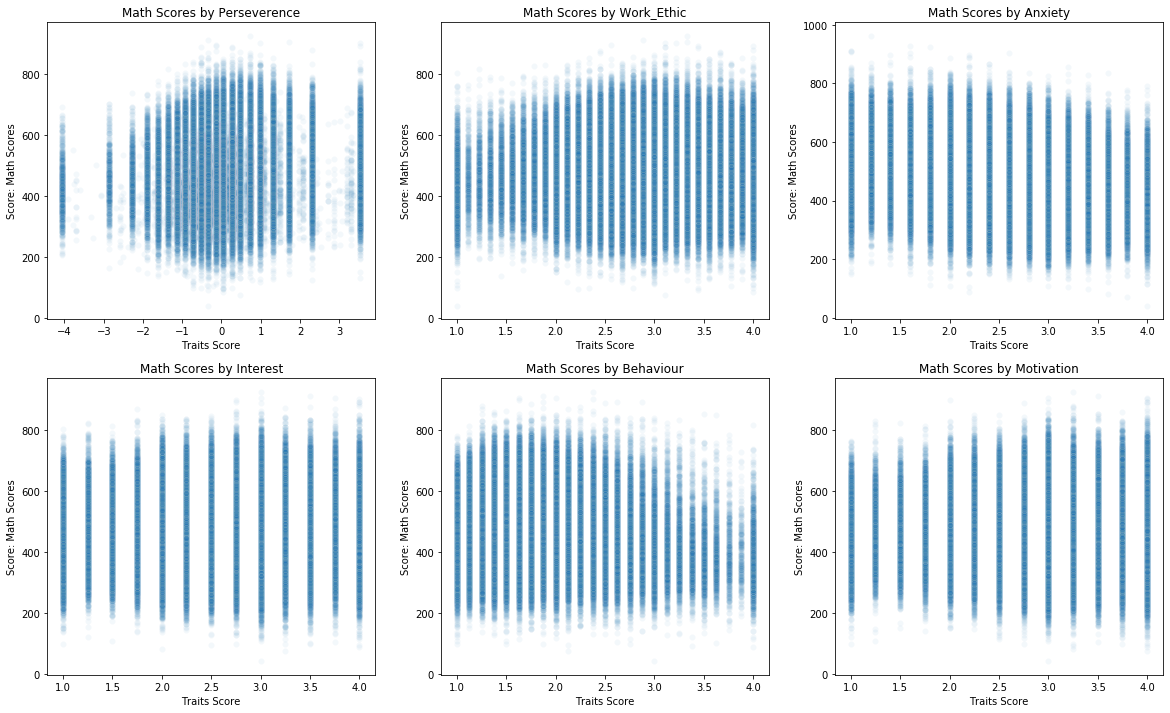

In [64]:
#traits = ['perseverence', 'work_ethic', 'anxiety', 'interest', 'behaviour', 'motivation']

fig, axes = plt.subplots(2, 3, figsize = [20, 12])

axes = axes.flatten() # reshape from 2x3 array into 6-element vector
i = 0

for col in traits:
    plt.sca(axes[i]) # set the current Axes
    
    sb.scatterplot(x=df_clean[col],y=df_clean['math_scores'],alpha=.05)
    axes[i].set_ylabel('Score: {}'.format('Math Scores'))
    axes[i].set_xlabel('Traits Score')
    axes[i].set_title('Math Scores by {}'.format(col.title()))
    i+=1


**Scores of students doesn't seem to be correlated with personal traits based on the above plots**

### How does Teacher relation and support affect grades?

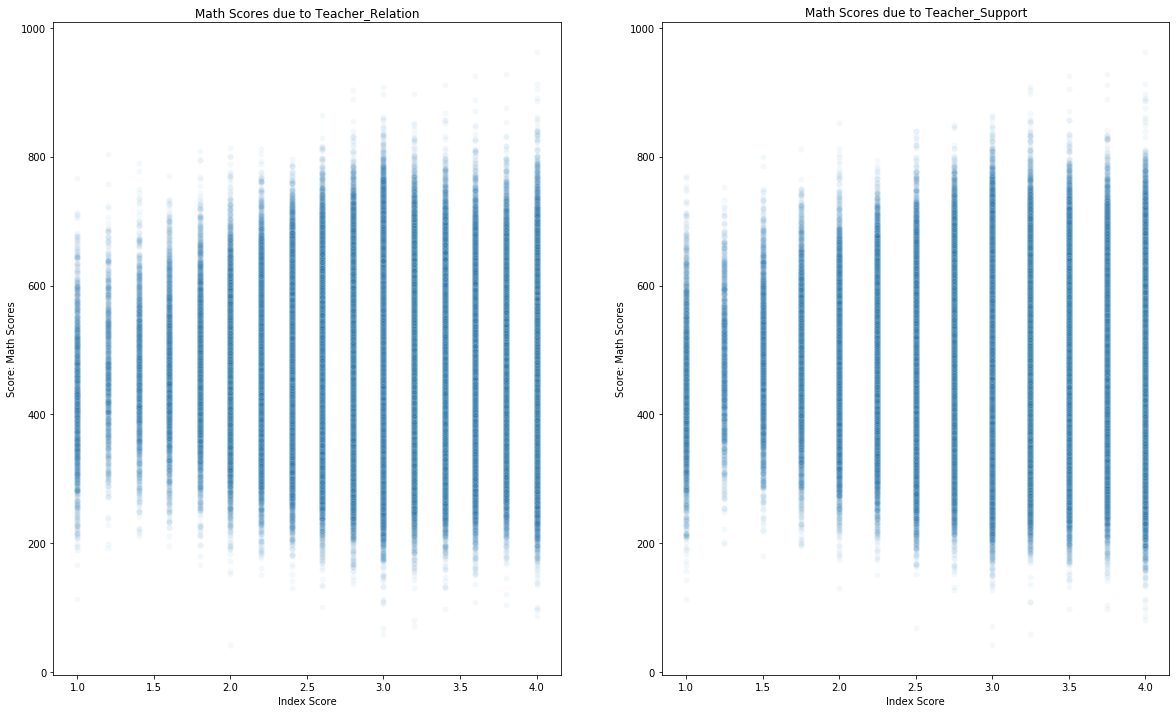

In [65]:
teacher_cols = ['teacher_relation', 'teacher_support']

fig, axes = plt.subplots(1, 2, figsize = [20, 12])

axes = axes.flatten() # reshape from 2x3 array into 6-element vector
i = 0

for col in teacher_cols:
    plt.sca(axes[i]) # set the current Axes
    
    sb.scatterplot(x=df_clean[col],y=df_clean['math_scores'],alpha=.05)
    axes[i].set_ylabel('Score: {}'.format('Math Scores'))
    axes[i].set_xlabel('Index Score')
    axes[i].set_title('Math Scores due to {}'.format(col.title()))
    i+=1

**There seems to be a weak correlation between teacher support and student-teacher relation with Math scores**

### Key insights from the relationships of multiple features with student grades

> - Eastern countries such as **China, Singapore, Korea, Hong Kong** consistently perform better than other countries
> - Parents being at home shows a definite increase in student grades. 
> - Personal traits of students could not show any significant affect on grades which was 
> - Teacher-Student relation and Teacher support showed a weak positive correlation

## Multivariate Exploration

> Let us now create plots of three or more variables to investigate the data even
further.

### Let us see the difference in scores between gender across all the countries

In [66]:
order = df_clean.groupby('country')['math_scores'].mean().sort_values(ascending = False).index

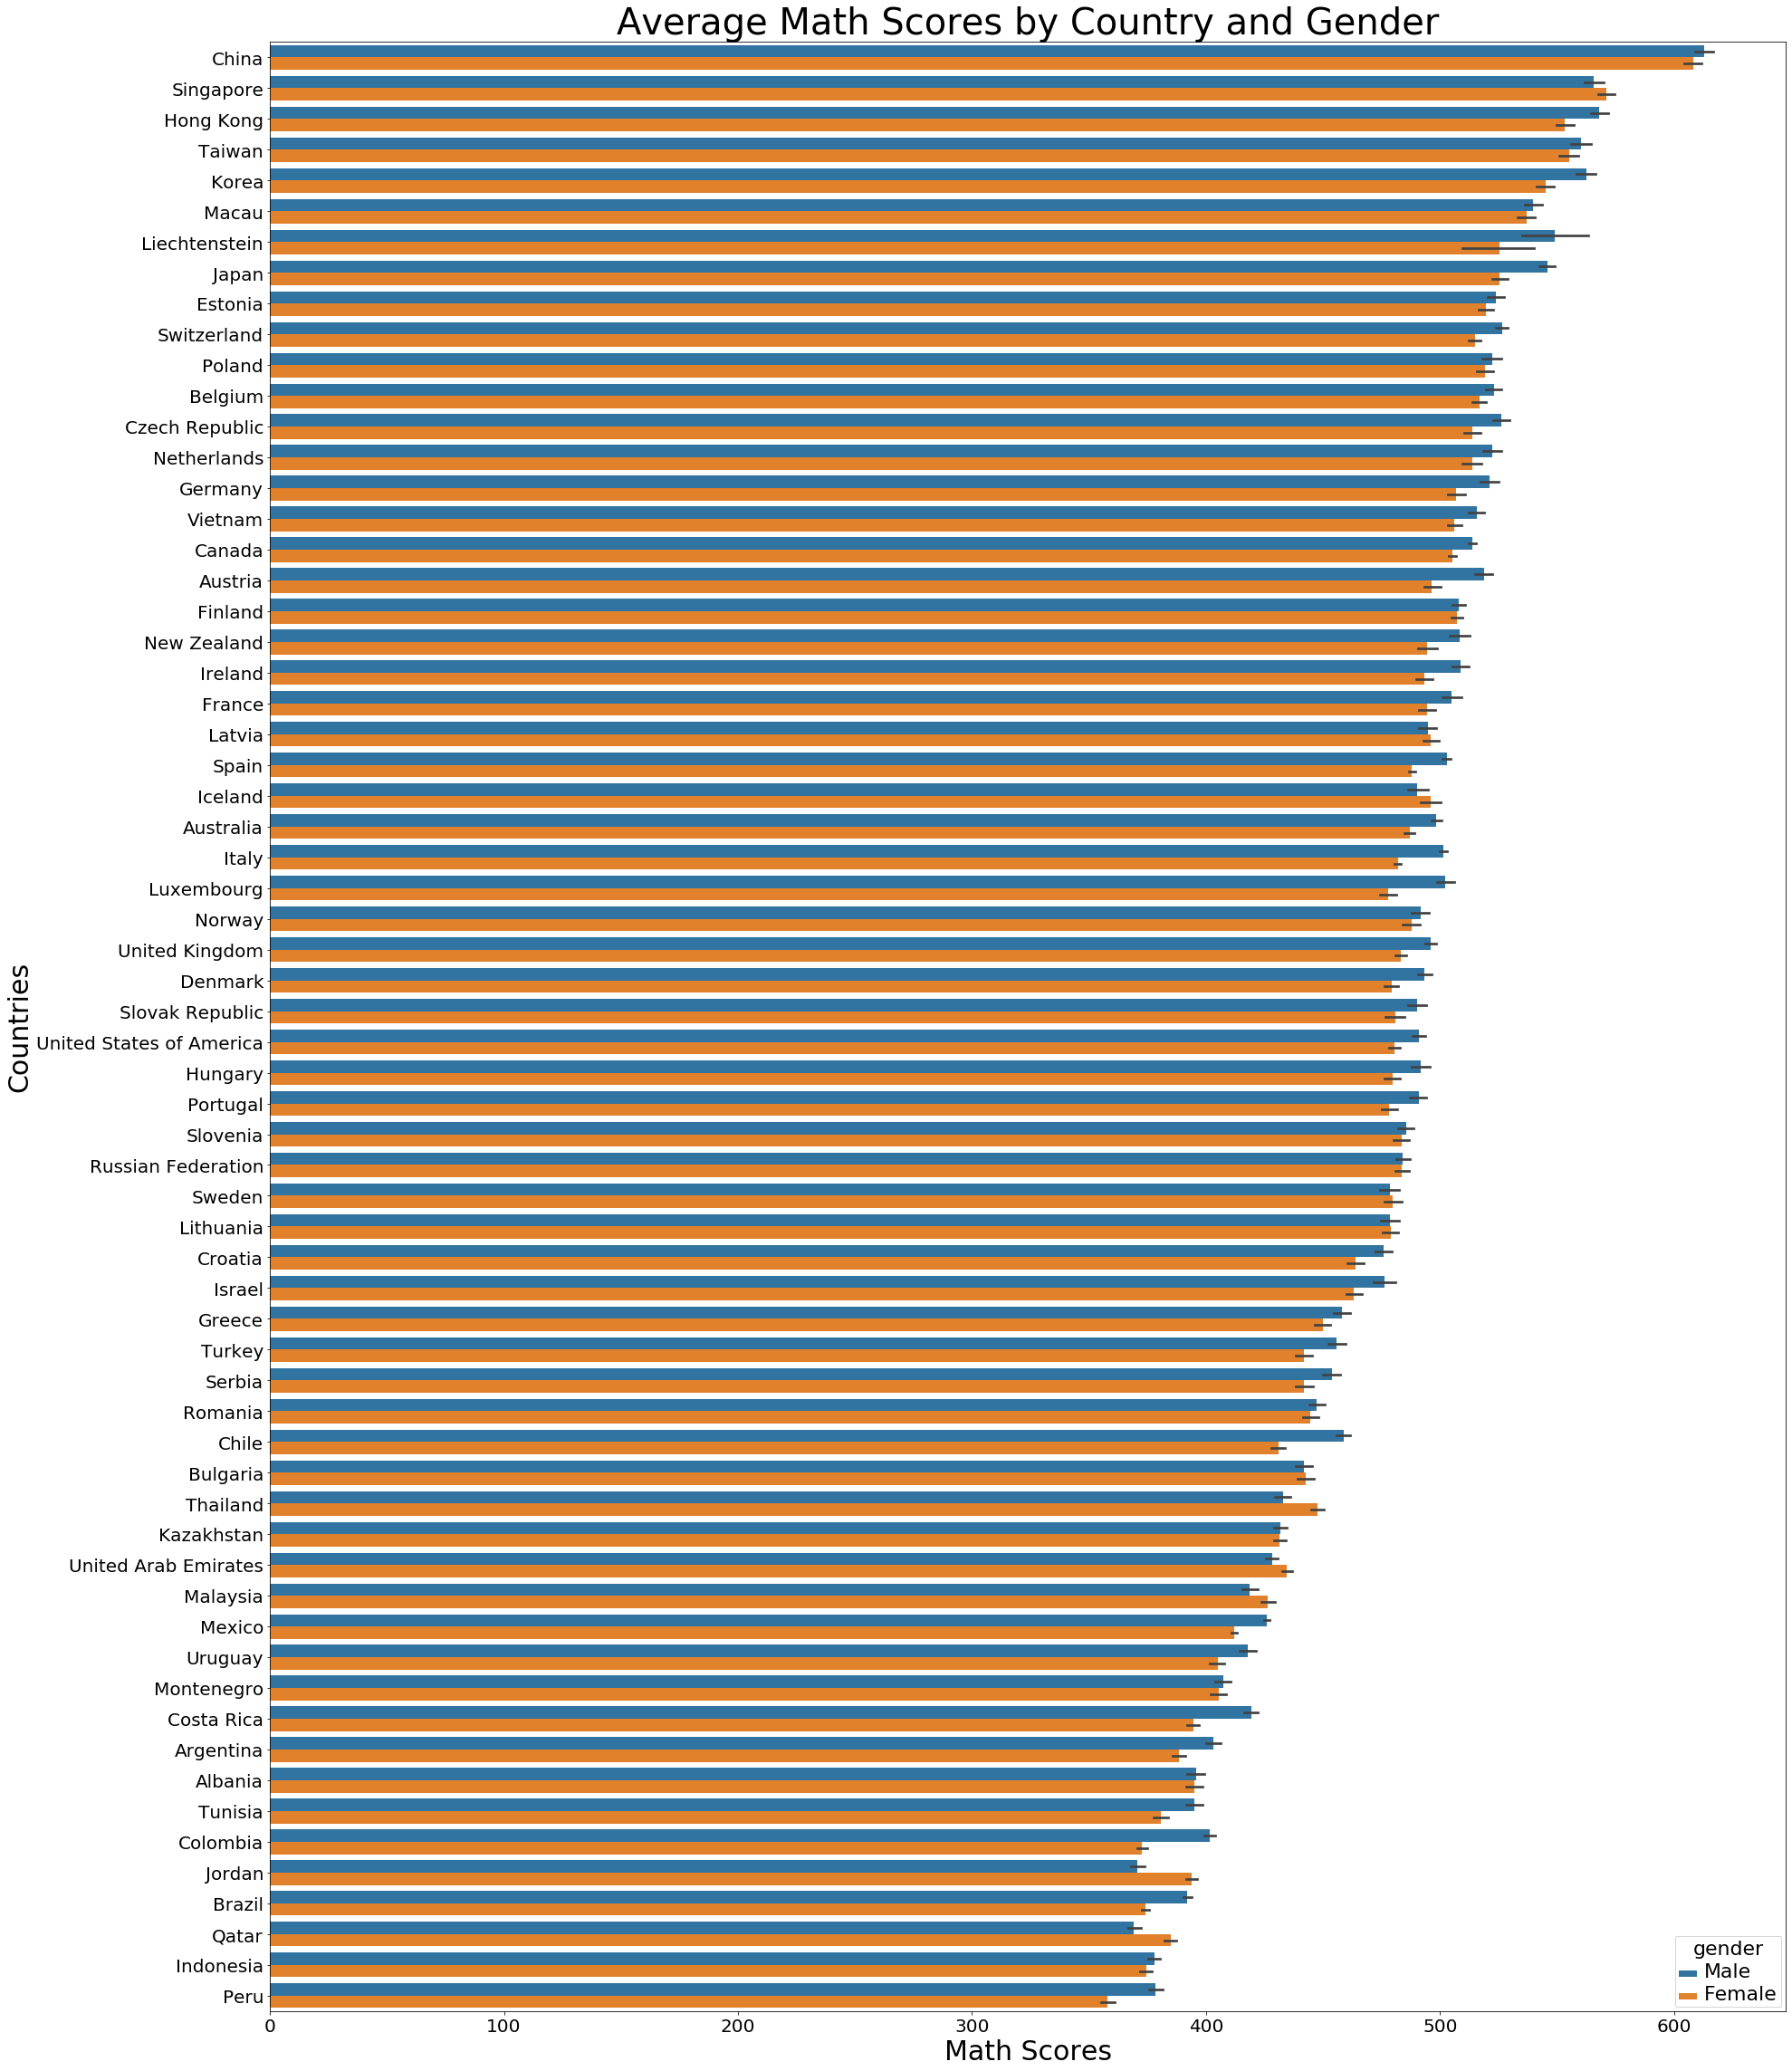

In [67]:
plt.figure(figsize = [30, 40])
b = sb.barplot(data = df_clean, y = 'country', x = 'math_scores', hue = 'gender', order = order, hue_order = ['Male', 'Female']);
b.axes.set_title("Average Math Scores by Country and Gender", fontsize=40)
b.set_xlabel("Math Scores",fontsize=30)
b.set_ylabel("Countries",fontsize=30)
b.tick_params(labelsize = 20)
plt.setp(b.get_legend().get_texts(), fontsize='22') # for legend text
plt.setp(b.get_legend().get_title(), fontsize='22');

**Males on average score more than females across most countries**

### Do students scoring high in one subject also score high in other subjects?

Therefore, let us observe the pair-by-pair relationship between Math Scores, Reading Scores and Science Scores, and correlate them in pair scatter plots, in order to see what type and strength of correlation exists.

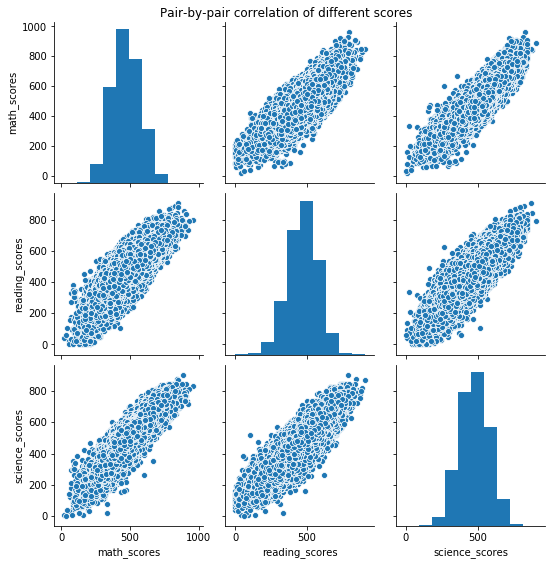

In [68]:
g = sb.pairplot(data = df_clean, vars=["math_scores", "reading_scores", "science_scores"]);
g.fig.suptitle("Pair-by-pair correlation of different scores", y = 1.02);

***As expected, there is a very strong and positive correlation between any pair of the three variables representing the scores of the three subjects.***

### Let us now check whether parents staying at home benefits both the gender equally or not

C:\Users\akars\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\akars\Anaconda3\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


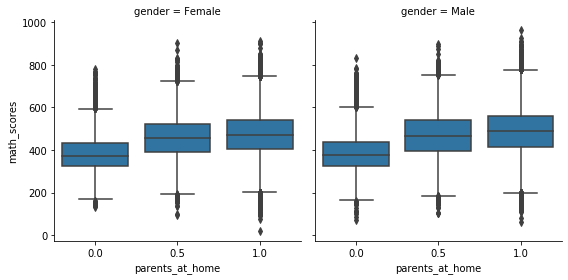

In [69]:
g = sb.FacetGrid(data = df_clean, col = 'gender', size = 4)
g.map(sb.boxplot, 'parents_at_home', 'math_scores');

***It can clearly be seen that parents at home benefits both genders equally in terms of grade scores***

### Conclusions
Lastly, we will restate our three questions of interest, along with a summary of our conclusions:

- **How do students from individual countries perform in Math, Reading and Science literacy?**
    - Eastern countries such as China, Singapore, Korea, Hong Kong outperform other countires

- **What is the effect of teachers on student grades?**
    - We could only find a weak positive correlation between teachers and student grades. 

- **What is the effect of conducive home environment on student grades?**
    - We discovered that either parent staying at home showed increase in student grades

- **What effect does student's own perseverence and study ethics has on his/her grades?**
    - We could not find any significant impact of personal traits on grades

- **Do grades differ based on gender across subjects in higher percentiles?**
    - We discovered that as the Males perform better in Math and Science where as Females perform better in Reading.